In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
!pip install xgboost
import xgboost as xgb

In [103]:
df=pd.read_csv("prosperLoanData.csv")
df.head(10)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   
8         NaN    36    Current                  NaN      0.07620   
9         NaN    36    Current                  NaN      0.07620   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   
5        0.1314       0.1214  ...          -25.33                0.0   
6        0.2712       0.2612  ...          -22.95                0.0   
7        0.2019       0.1919  ...          -69.21                0.0   
8        0.0629       0.0529  ...          -16.77                0.0   
9        0.0629       0.0529  ...          -16.77                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   
5                    0.0                  0.0                             0.0   
6                    0.0                  0.0                             0.0   
7                    0.0                  0.0                             0.0   
8                    0.0                  0.0                             0.0   
9                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   
5            1.0                0                          0   
6            1.0                0                          0   
7            1.0                0                          0   
8            1.0                0                          0   
9            1.0                0                          0   

  InvestmentFromFriendsAmount Investors 

In [104]:
df.shape

(113937, 81)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [106]:
df.isna().any()

ListingKey                     False
ListingNumber                  False
ListingCreationDate            False
CreditGrade                     True
Term                           False
                               ...  
PercentFunded                  False
Recommendations                False
InvestmentFromFriendsCount     False
InvestmentFromFriendsAmount    False
Investors                      False
Length: 81, dtype: bool

In [107]:
# Calculate missing value percentage
missing_percent = (df.isnull().sum() / len(df)) * 100

# Filter only columns with missing values
missing_percent = missing_percent[missing_percent > 0]

# Display results
print(missing_percent.sort_values(ascending=False))

GroupKey                               88.290898
LoanFirstDefaultedCycleNumber          85.121602
ScorexChangeAtTimeOfListing            83.387311
ProsperPrincipalOutstanding            80.616481
ProsperPrincipalBorrowed               80.616481
ProsperPaymentsOneMonthPlusLate        80.616481
ProsperPaymentsLessThanOneMonthLate    80.616481
OnTimeProsperPayments                  80.616481
TotalProsperPaymentsBilled             80.616481
TotalProsperLoans                      80.616481
CreditGrade                            74.588588
ClosedDate                             51.649596
EstimatedEffectiveYield                25.526387
EstimatedLoss                          25.526387
EstimatedReturn                        25.526387
ProsperRating (numeric)                25.526387
ProsperRating (Alpha)                  25.526387
ProsperScore                           25.526387
DebtToIncomeRatio                       7.507658
EmploymentStatusDuration                6.692295
AmountDelinquent    

In [108]:
df = df.drop_duplicates().reset_index(drop=True)

In [109]:
# Convert columns to datetime
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df['FirstRecordedCreditLine'] = pd.to_datetime(df['FirstRecordedCreditLine'])
df['DateCreditPulled'] = pd.to_datetime(df['DateCreditPulled'])

In [110]:
df['EmploymentStatus'] = df['EmploymentStatus'].replace('Not available', np.nan)
df['IncomeRange'] = df['IncomeRange'].replace('Not displayed', np.nan)

In [111]:
df['IncomeRange'] = df['IncomeRange'].replace('Not employed', 0)

In [112]:
df['Occupation'] = df['Occupation'].apply(lambda x: 'Student' if str(x).startswith('Student') else x)

In [113]:
df['LoanOriginationYear'] = df['LoanOriginationQuarter'].str.split().str[1].astype(int)
df['LoanOriginationQuarter'] = df['LoanOriginationQuarter'].str.split().str[0]

In [114]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [115]:
df.replace('', np.nan, inplace=True) 

In [116]:
# Define a function to categorize the values
def categorize_status(status):
    if status in ['Retired', 'Not employed']:
        return 'Not employed'
    elif status in ['Full-time', 'Part-time', 'Employed']:
        return 'Employed'
    elif status == 'Self-employed':
        return 'Self-employed'
    else:
        return 'Other'

# Apply the function to the 'Employment_status' column
df['EmploymentStatus'] = df['EmploymentStatus'].apply(categorize_status)

In [117]:
def clean_income(value):
    
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        value = value.replace('$', '').replace(',', '')
        if '-' in value:
            lower, upper = value.split('-')
            return (int(lower) + int(upper)) / 2
        elif '+' in value:
            value = value.replace('+', '')
            return int(value)
        else:
            try:
                return int(value)
            except ValueError:
                return np.nan  # Handle cases where string cannot be converted to integer
    return value

# Clean and convert IncomeRange to IncomeAvg
df['IncomeAvg'] = df['IncomeRange'].apply(clean_income)

# Handle missing values based on EmploymentStatus
df.loc[df['EmploymentStatus'] == 'Not employed', ['IncomeAvg', 'StatedMonthlyIncome']] = 0

# Fill remaining NaN values with the median
median_income = df['IncomeAvg'].median()
df['IncomeAvg'].fillna(median_income, inplace=True)

# Drop the original IncomeRange column
df.drop(['IncomeRange'], axis=1, inplace=True)

df

ListingKey  ListingNumber     ListingCreationDate  \
0       1021339766868145413AB3B         193129 2007-08-26 19:09:29.263   
1       10273602499503308B223C1        1209647 2014-02-27 08:28:07.900   
2       0EE9337825851032864889A          81716 2007-01-05 15:00:47.090   
3       0EF5356002482715299901A         658116 2012-10-22 11:02:35.010   
4       0F023589499656230C5E3E2         909464 2013-09-14 18:38:39.097   
...                         ...            ...                     ...   
113932  E6D9357655724827169606C         753087 2013-04-14 05:55:02.663   
113933  E6DB353036033497292EE43         537216 2011-11-03 20:42:55.333   
113934  E6E13596170052029692BB1        1069178 2013-12-13 05:49:12.703   
113935  E6EB3531504622671970D9E         539056 2011-11-14 13:18:26.597   
113936  E6ED3600409833199F711B7        1140093 2014-01-15 09:27:37.657   

       CreditGrade  Term              LoanStatus           ClosedDate  \
0                C    36               Completed  2009-08-14 00:00:00   
1              NaN    36                 Current                  NaN   
2               HR    36               Completed  2009-12-17 00:00:00   
3              NaN    36                 Current                  NaN   
4              NaN    36                 Current                  NaN   
...            ...   ...                     ...                  ...   
113932         NaN    36                 Current                  NaN   
113933         NaN    36  FinalPaymentInProgress                  NaN   
113934         NaN    60                 Current                  NaN   
113935         NaN    60               Completed  2013-08-13 00:00:00   
113936         NaN    36                 Current                  NaN   

        BorrowerAPR  BorrowerRate  LenderYield  ...  LP_GrossPrincipalLoss  \
0           0.16516        0.1580       0.1380  ...                    0.0   
1           0.12016        0.0920       0.0820  ...                    0.0   
2           0.28269        0.2750       0.2400  ...                    0.0   
3           0.12528        0.0974       0.0874  ...                    0.0   
4           0.24614        0.2085       0.1985  ...                    0.0   
...             ...           ...          ...  ...                    ...   
113932      0.22354        0.1864       0.1764  ...                    0.0   
113933      0.13220        0.1110       0.1010  ...                    0.0   
113934      0.23984        0.2150       0.2050  ...                    0.0   
113935      0.28408        0.2605       0.2505  ...                    0.0   
113936      0.13189        0.1039       0.0939  ...                    0.0   

        LP_NetPrincipalLoss  LP_NonPrincipalRecoverypayments  PercentFunded  \
0                       0.0                              0.0            1.0   
1                       0.0                              0.0            1.0   
2                       0.0                              0.0            1.0   
3                       0.0                              0.0            1.0   
4                       0.0                              0.0            1.0   
...                     ...                              ...            ...   
113932                  0.0                              0.0            1.0   
113933                  0.0                              0.0            1.0   
113934                  0.0                              0.0            1.0   
113935                  0.0                              0.0            1.0   
113936                  0.0                              0.0            1.0   

       Recommendations  InvestmentFromFriendsCount  \
0                    0                           0   
1                    0                           0   
2                    0                           0   
3                    0                           0   
4                    0                           0   
...                ...                       

In [118]:
# Fill Occupation and EmploymentStatus nulls
def impute_missing_values(df):

  df['Occupation'] = df.apply(lambda row: 'Other' if pd.isnull(row['Occupation']) and not pd.isnull(row['EmploymentStatus']) else row['Occupation'], axis=1)
  df['EmploymentStatus'] = df.apply(lambda row: 'Other' if pd.isnull(row['EmploymentStatus']) and not pd.isnull(row['Occupation']) else row['EmploymentStatus'], axis=1)
  df['Occupation'] = df.apply(lambda row: 'Other' if pd.isnull(row['Occupation']) and pd.isnull(row['EmploymentStatus']) else row['Occupation'], axis=1)
  df['EmploymentStatus'] = df.apply(lambda row: 'Other' if pd.isnull(row['Occupation']) and pd.isnull(row['EmploymentStatus']) else row['EmploymentStatus'], axis=1)

  return df

df = impute_missing_values(df)

In [119]:
df['LoanOriginationQuarter'].replace('', np.nan, inplace=True)
df['LoanOriginationYear'].replace('', np.nan, inplace=True)

In [120]:
df['LoanOriginationYear']

0         2007
1         2014
2         2007
3         2012
4         2013
          ... 
113932    2013
113933    2011
113934    2013
113935    2011
113936    2014
Name: LoanOriginationYear, Length: 113937, dtype: int32

In [121]:
# Encode LoanStatus
df["LoanStatus"] = df["ClosedDate"].apply(lambda x: 0 if pd.notnull(x) else 1)
df["LoanStatus"] = df.apply(
    lambda row: 1 if row["LoanCurrentDaysDelinquent"] > 180 else row["LoanStatus"], axis=1
)

In [122]:
df['ProsperScore'] = df['ProsperScore'].clip(upper=10)

In [123]:
df['LoanOriginationYear'] = pd.to_numeric(df['LoanOriginationYear'], errors='coerce')
df['LoanOriginationYear'].dtype

dtype('int32')

In [124]:
df.columns = df.columns.str.replace(r'[\s_]', '', regex=True)

In [125]:
df['ClosedStatusFlag'] = df['ClosedDate'].notna().astype(int)
df['TimeSinceCreditPulled'] = (df['LoanOriginationDate'] - df['DateCreditPulled']).dt.days
df['OnTimePaymentRatio'] = df['OnTimeProsperPayments'] / (df['TotalProsperPaymentsBilled'] + 1)
df['DaysToOrigination'] = (df['LoanOriginationDate'] - df["ListingCreationDate"]).dt.days
df['CreditHistoryLength'] = (df['LoanOriginationDate'] - df['FirstRecordedCreditLine']).dt.days
df['CreditAgeAtListing'] = df['ListingCreationDate'].dt.year - df['FirstRecordedCreditLine'].dt.year

In [126]:
# Automatically detect categorical and numerical columns
cat_cols = df.select_dtypes(include=['object', 'category','bool']).columns.tolist()
num_cols = df.select_dtypes(include=['int64','int32', 'float64']).columns.tolist()
date_cols = df.select_dtypes(include=['datetime64']).columns.tolist() 


# Separate categorical and numerical data
cat_data = df[cat_cols]
num_data = df[num_cols]
date_data = df[date_cols]

In [127]:
date_data = date_data.fillna(df.mode().iloc[0])

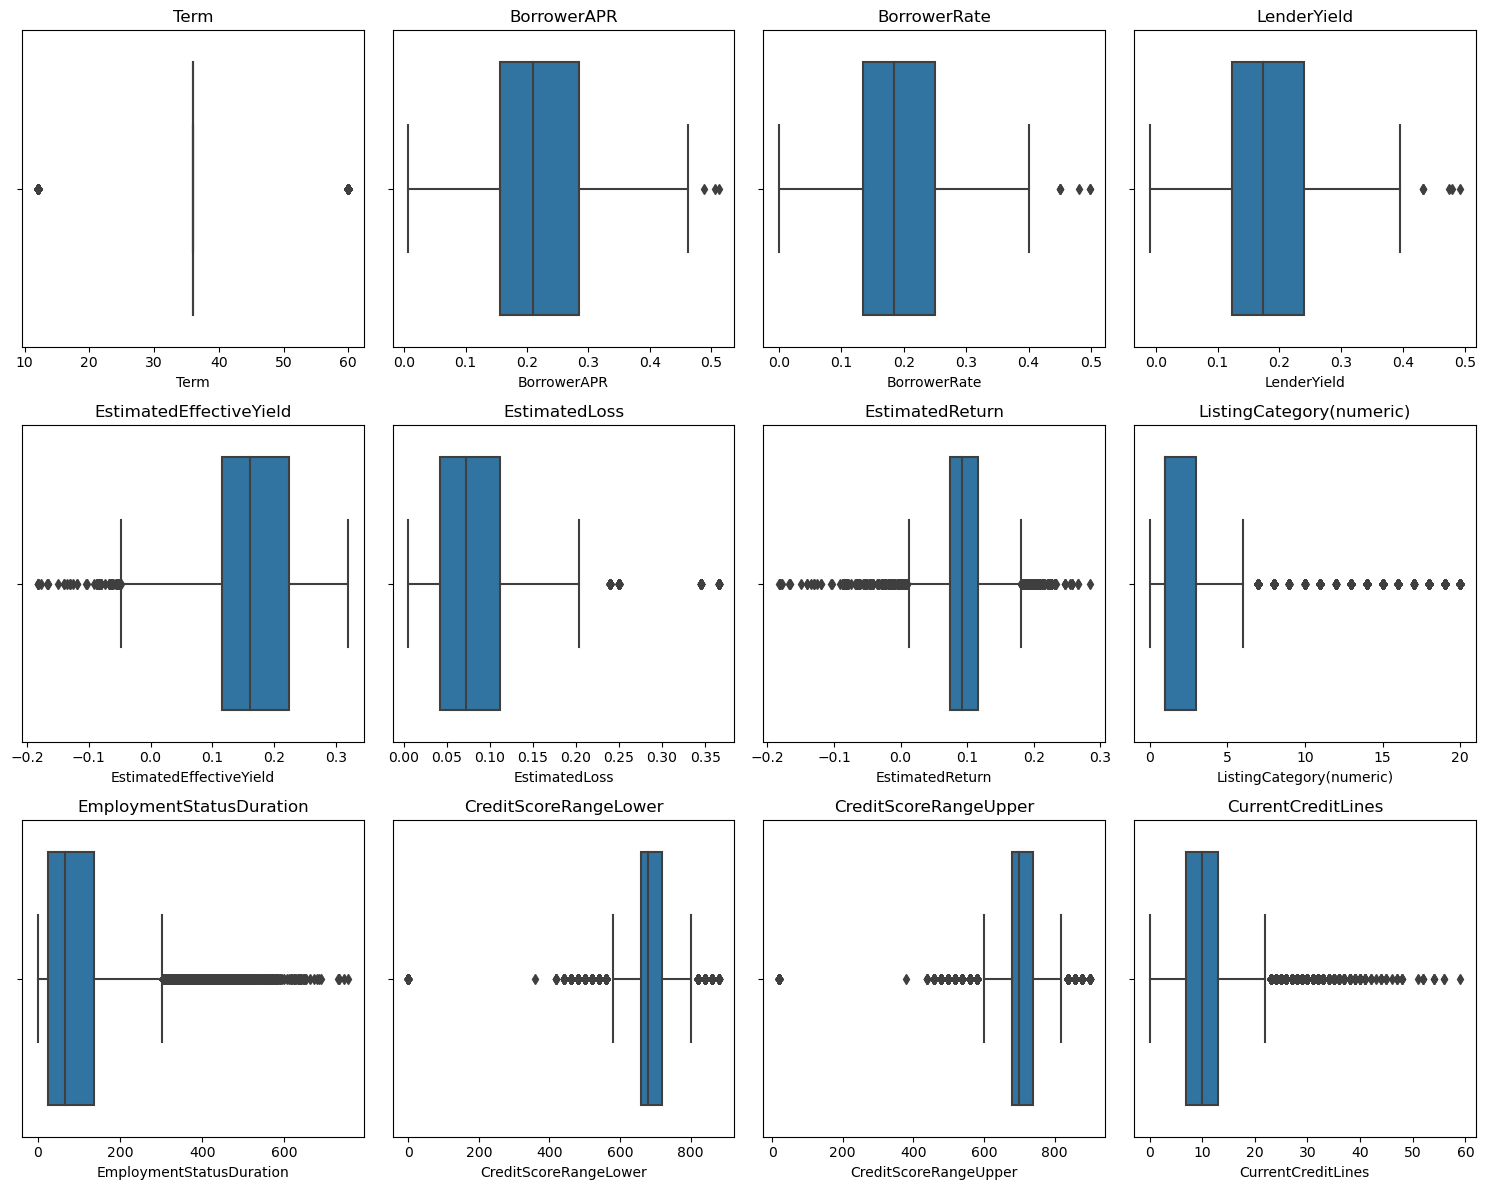

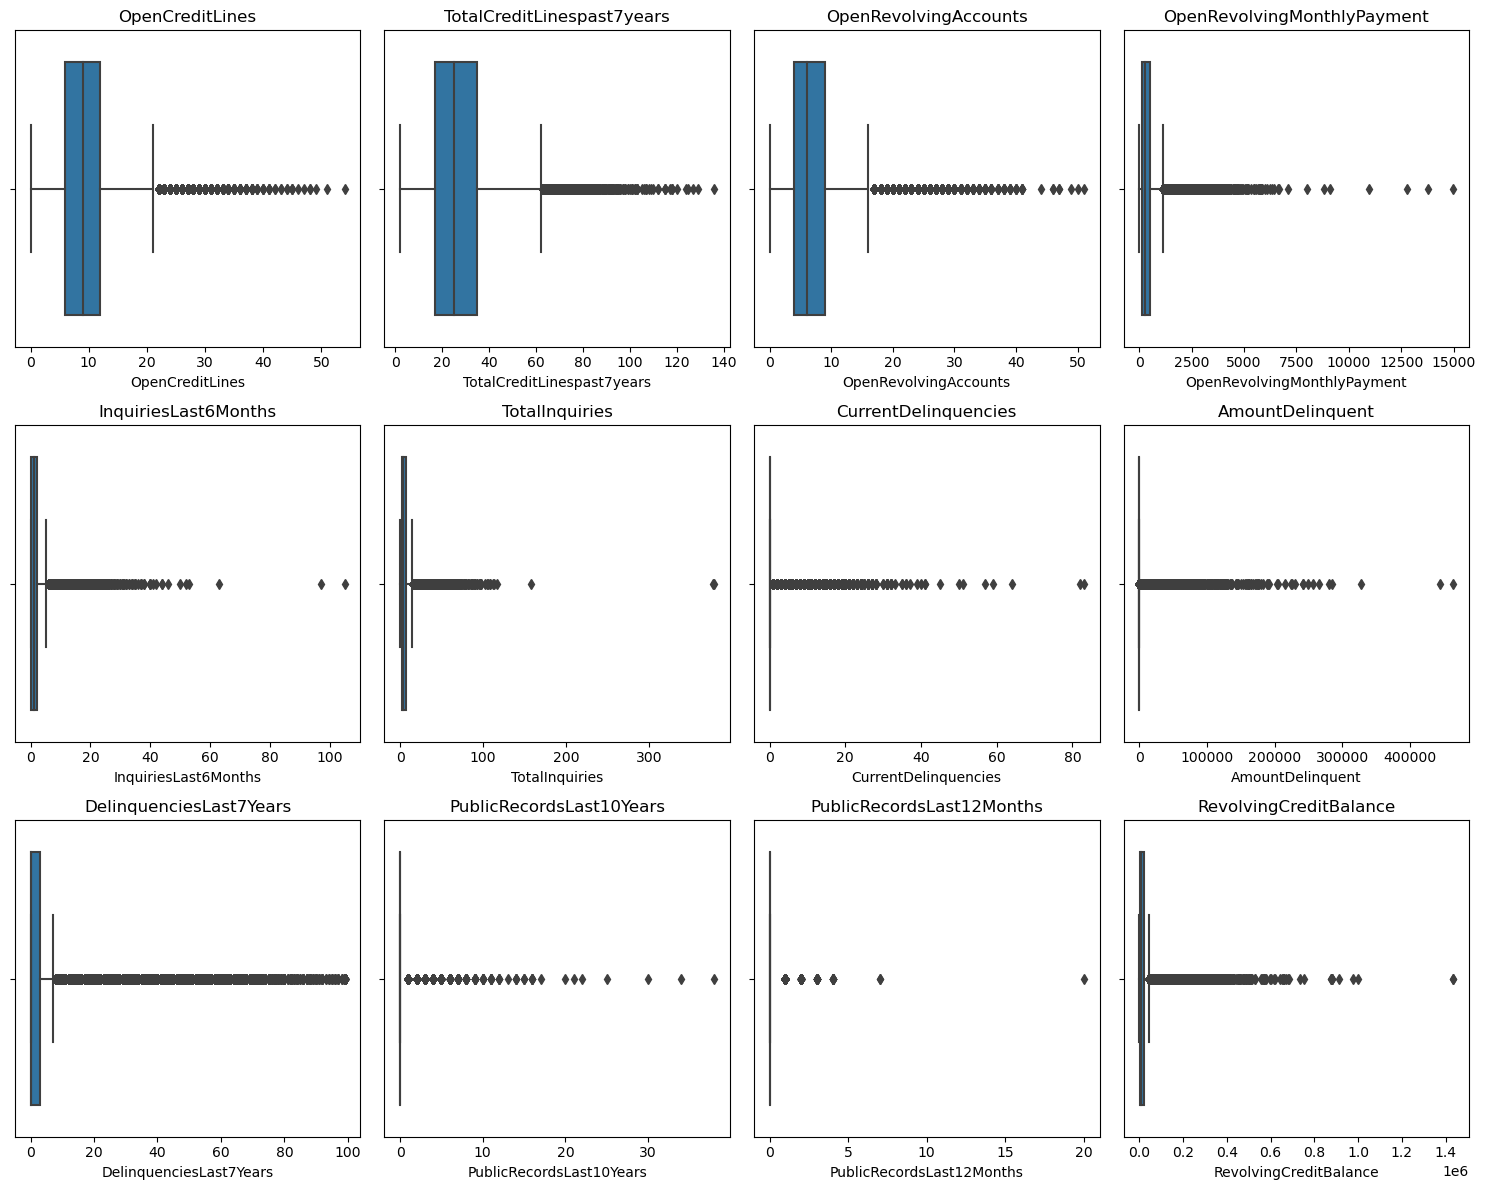

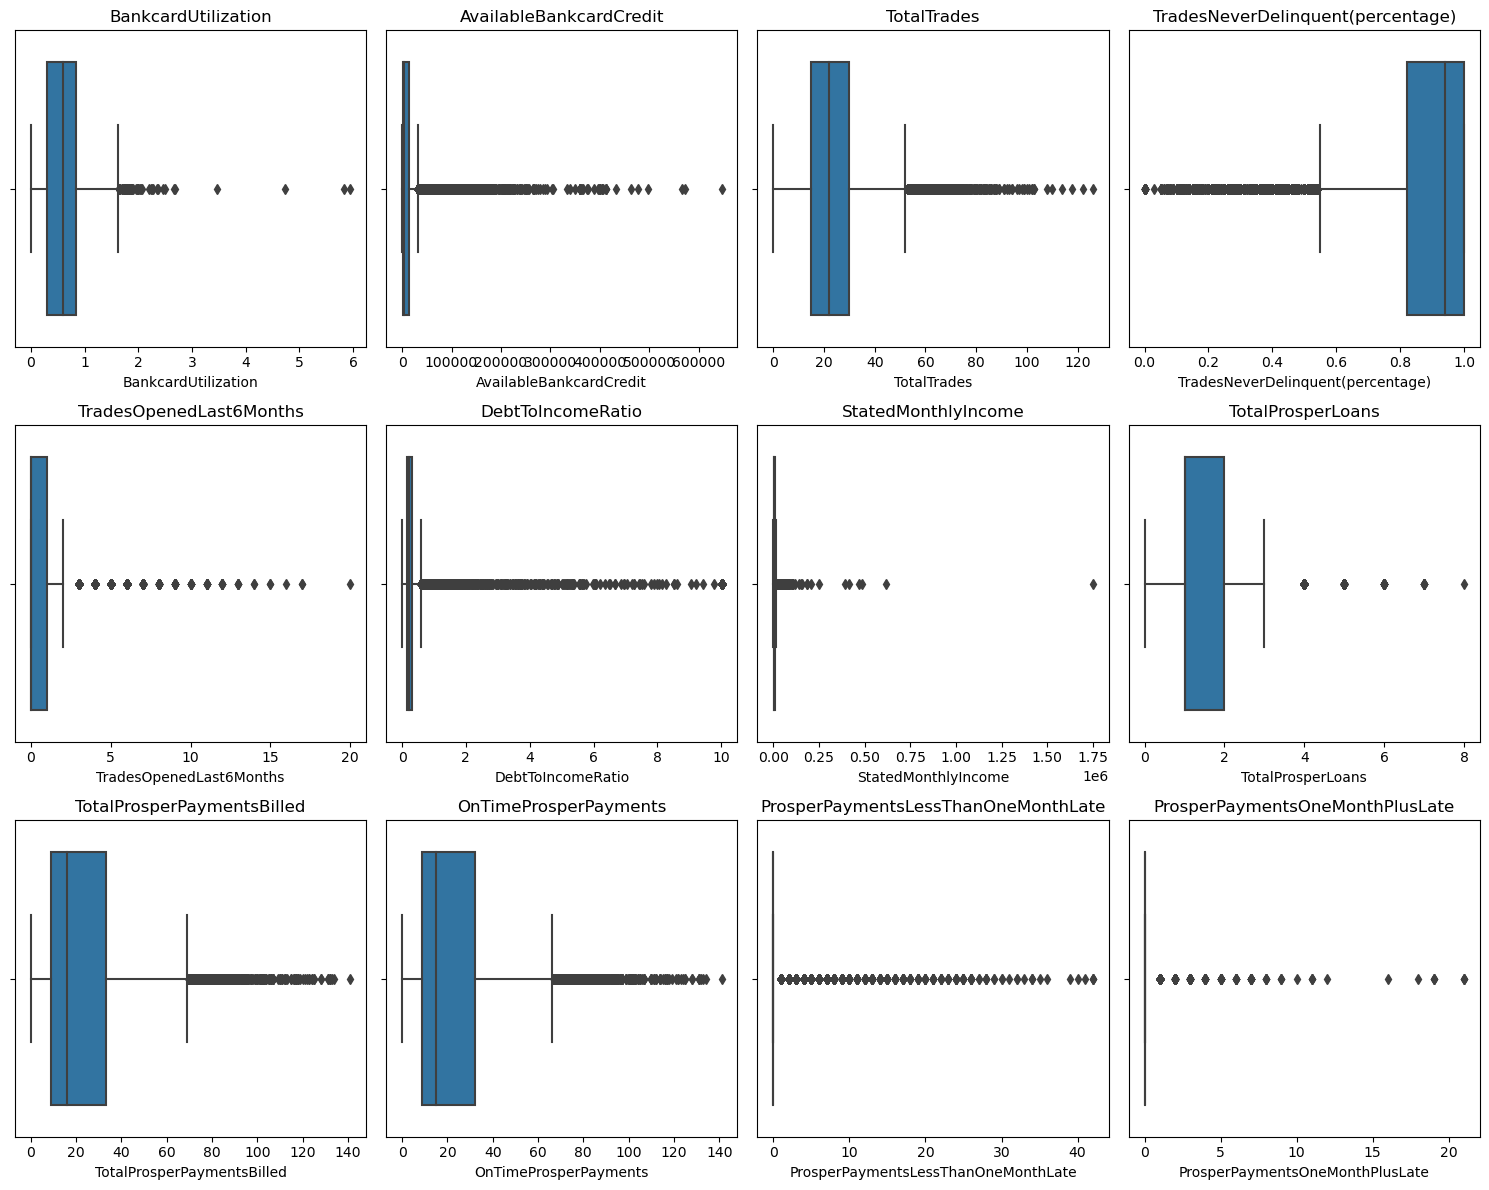

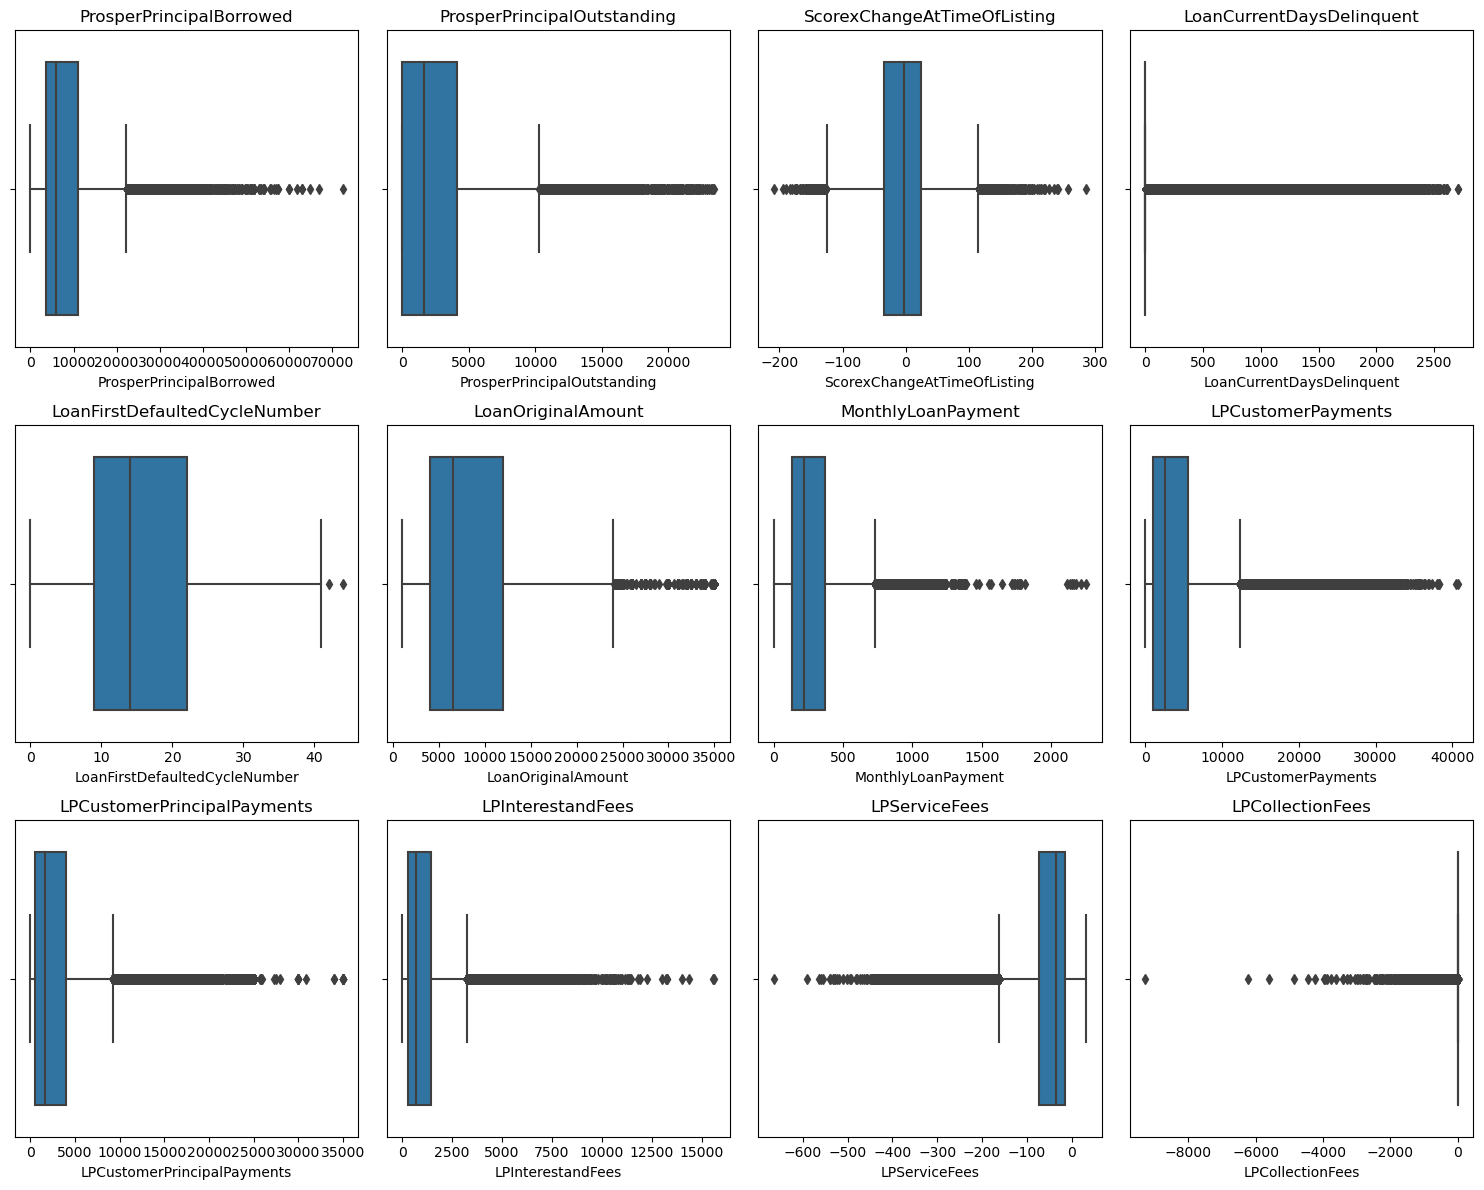

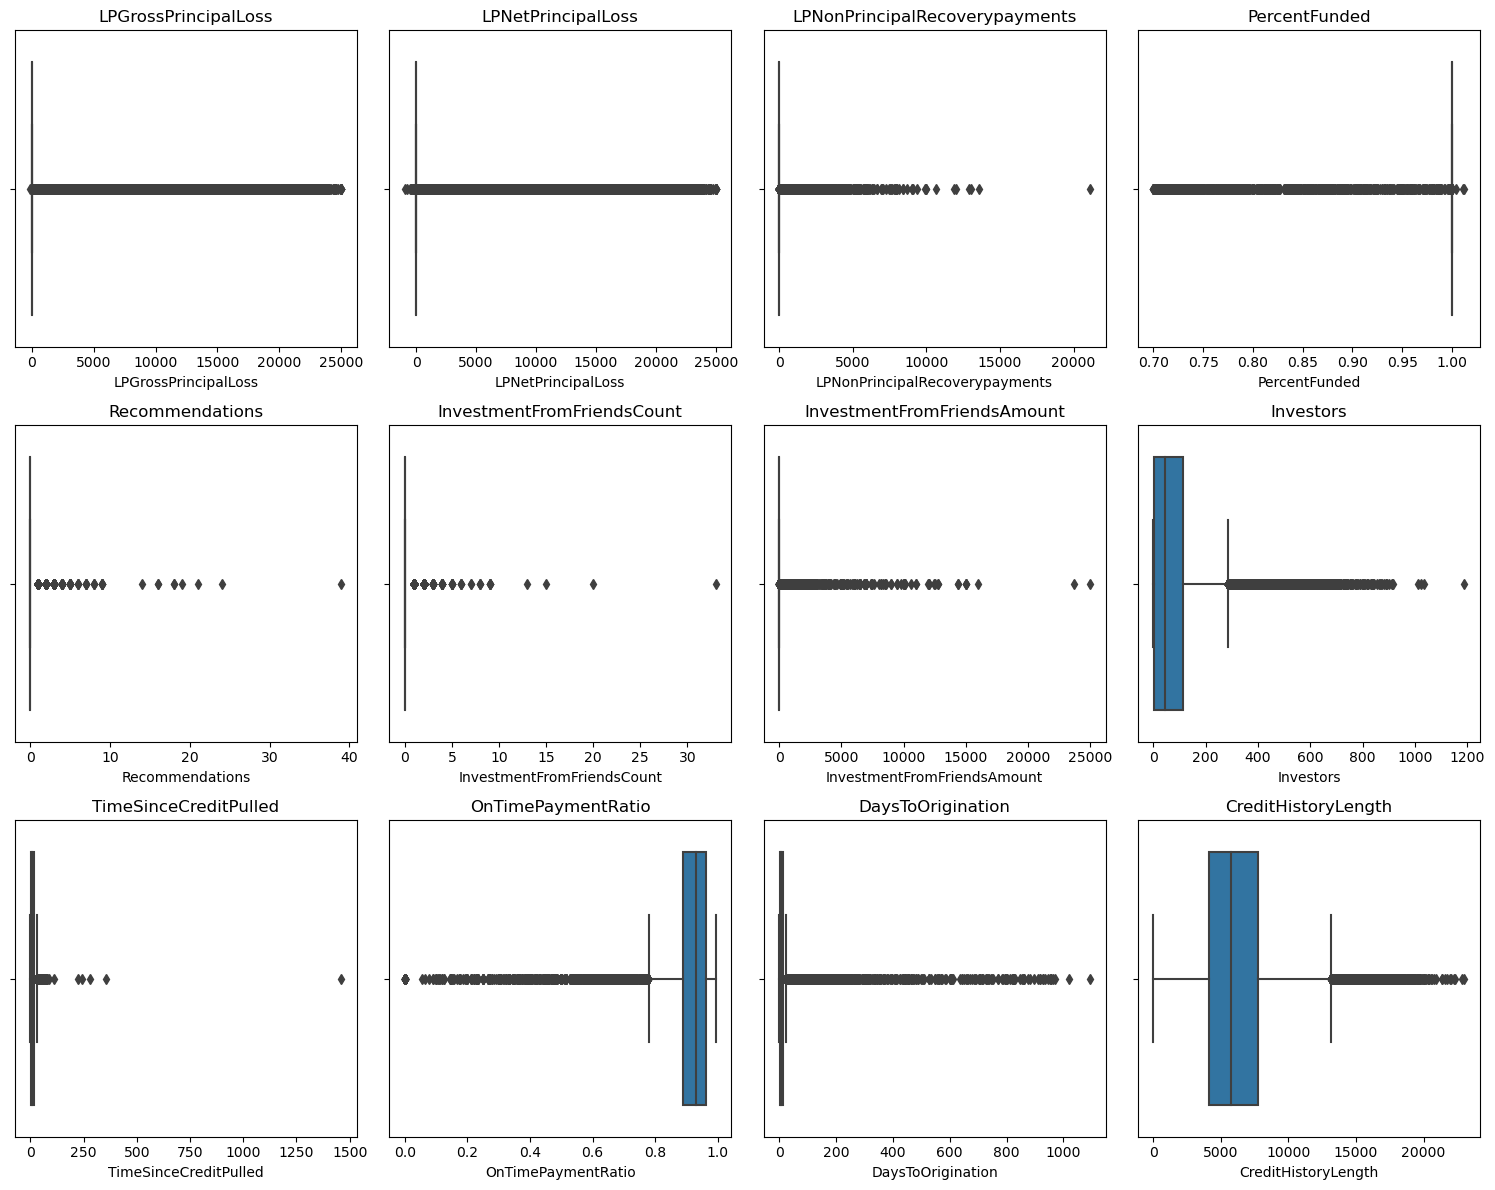

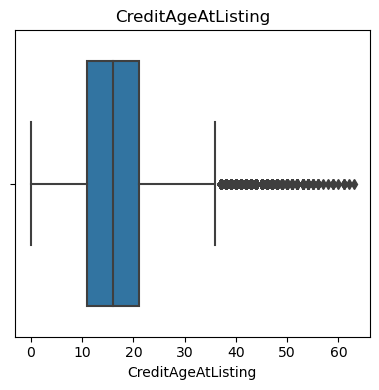

In [128]:
# Identify columns with outliers using the IQR method
outlier_columns = []
for col in num_data.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    
    if not outliers.empty:  # Check if the column has outliers
        outlier_columns.append(col)

# Plot boxplots only for columns with outliers
if outlier_columns:
    num_cols = len(outlier_columns)  # Total number of columns with outliers
    num_plots_per_fig = 12  # Set a limit for plots per figure (adjustable)
    
    # Loop through in batches
    for i in range(0, num_cols, num_plots_per_fig):
        subset_cols = outlier_columns[i:i+num_plots_per_fig]  # Take a batch
        
        # Set grid size dynamically (max 4 columns per row)
        num_subplots = len(subset_cols)
        num_rows = math.ceil(num_subplots / 4)  # Max 4 columns per row
        
        plt.figure(figsize=(15, num_rows * 4))  # Adjust height dynamically
        
        for j, col in enumerate(subset_cols, 1):
            plt.subplot(num_rows, 4, j)  # Create subplot grid
            sns.boxplot(x=df[col])
            plt.title(col)

        plt.tight_layout()
        plt.show()
else:
    print("No outliers detected in any numerical columns.")


In [129]:
num_data.replace('', np.nan, inplace=True)

C:\Users\Sc\AppData\Local\Temp\ipykernel_34104\1219485672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data.replace('', np.nan, inplace=True)


In [130]:
columns_to_exclude = ['ListingNumber', 'ProsperRating(numeric)','IncomeAvg','ListingCategory(numeric)','LoanNumber','ProsperScore','ClosedStatusFlag'] 

num_data.loc[:, ~num_data.columns.isin(columns_to_exclude)] = num_data.drop(columns=columns_to_exclude).fillna(num_data.median())

C:\Users\Sc\AppData\Local\Temp\ipykernel_34104\3941191174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data.loc[:, ~num_data.columns.isin(columns_to_exclude)] = num_data.drop(columns=columns_to_exclude).fillna(num_data.median())


In [131]:
columns_to_fill = ['ListingNumber', 'ProsperRating(numeric)','IncomeAvg','ListingCategory(numeric)','LoanNumber','ProsperScore']

for col in columns_to_fill:
    num_data[col] = num_data[col].fillna(num_data[col].mode()[0])  # Fill NaNs with mode

C:\Users\Sc\AppData\Local\Temp\ipykernel_34104\647992786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[col] = num_data[col].fillna(num_data[col].mode()[0])  # Fill NaNs with mode
C:\Users\Sc\AppData\Local\Temp\ipykernel_34104\647992786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[col] = num_data[col].fillna(num_data[col].mode()[0])  # Fill NaNs with mode
C:\Users\Sc\AppData\Local\Temp\ipykernel_34104\647992786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [132]:
num_data.columns

Index(['ListingNumber', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating(numeric)', 'ProsperScore',
       'ListingCategory(numeric)', 'EmploymentStatusDuration',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines',
       'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent(percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLess

In [133]:
cat_data.columns

Index(['ListingKey', 'CreditGrade', 'ClosedDate', 'ProsperRating(Alpha)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'IncomeVerifiable', 'LoanKey', 'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')

In [134]:
# Get the count of nulls in each column
null_counts = num_data.isnull().sum()

# Filter to show only columns with nulls
columns_with_nulls = null_counts[null_counts > 0]

# Print the columns with their null counts
print(columns_with_nulls)

num_data['LoanOriginationYear'].nunique()

Series([], dtype: int64)


10

In [135]:
columns_to_exclude = ['ListingNumber','ProsperRating(numeric)','ListingCategory(numeric)','LoanNumber','ProsperScore','LoanOriginationYear','LoanStatus','IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable']  

def standardize_columns(num_data, exclude_columns):

  scaler = StandardScaler()

  # Select numerical columns
  num_cols = num_data.select_dtypes(include=['float64', 'int64','int32']).columns

  # Exclude specified columns
  cols_to_standardize = [col for col in num_cols if col not in exclude_columns]

  # Standardize selected columns
  df_standardized = num_data.copy()  # Create a copy of the original DataFrame
  df_standardized[cols_to_standardize] = scaler.fit_transform(num_data[cols_to_standardize])

  return df_standardized


num_data = standardize_columns(num_data, columns_to_exclude)

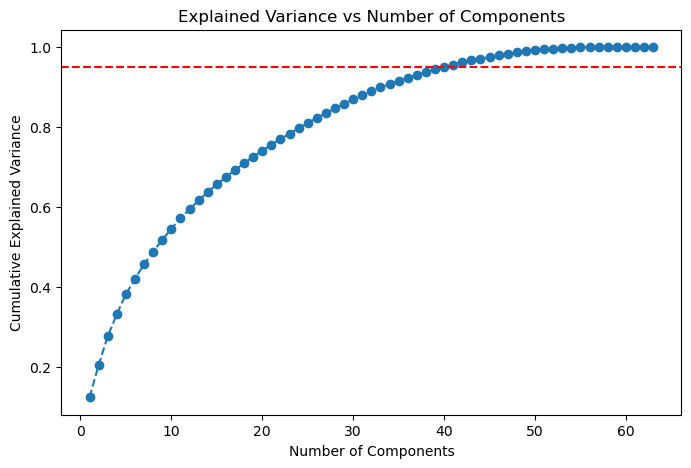

In [136]:
# Select columns for PCA (excluding some numerical features)
columns_to_exclude = ['ListingNumber', 'ProsperRating(numeric)', 
                     'ListingCategory(numeric)', 'LoanNumber', 
                     'ProsperScore', 'LoanOriginationYear', 
                     'LoanStatus']

columns_for_pca = [col for col in num_data.columns if col not in columns_to_exclude]

# Perform PCA (Fit first, then transform separately)
pca = PCA()
pca.fit(num_data[columns_for_pca])  # Fit PCA only on selected numerical columns
transformed_data = pca.transform(num_data[columns_for_pca])  # Transform separately

# Calculate cumulative explained variance
cum_var = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% variance threshold
plt.show()

In [137]:
pca = PCA()
pca.fit(num_data[columns_for_pca])

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:\n", explained_variance)

Explained Variance Ratio:
 [1.24896497e-01 8.09135350e-02 7.16446976e-02 5.52008618e-02
 5.01140362e-02 3.82175269e-02 3.70243707e-02 3.09886631e-02
 2.95626254e-02 2.77659249e-02 2.56846440e-02 2.29125437e-02
 2.22818735e-02 2.06169401e-02 1.94792502e-02 1.80354195e-02
 1.77114587e-02 1.68457530e-02 1.62511581e-02 1.53534175e-02
 1.47250860e-02 1.41295699e-02 1.37090429e-02 1.33018451e-02
 1.30163963e-02 1.25859920e-02 1.23167650e-02 1.19179228e-02
 1.15793872e-02 1.12455933e-02 1.03833702e-02 9.79351533e-03
 9.11994187e-03 8.22488100e-03 8.01408034e-03 7.52813697e-03
 7.45703888e-03 7.10893085e-03 6.92884850e-03 6.42215078e-03
 5.69668351e-03 5.55645730e-03 4.82606207e-03 4.30071776e-03
 4.08249492e-03 4.01946378e-03 3.97687902e-03 3.61463797e-03
 3.43423863e-03 2.40813522e-03 2.04070499e-03 1.44402865e-03
 1.30170190e-03 1.17249581e-03 5.31220725e-04 4.00080583e-04
 7.37917151e-05 6.99136154e-05 2.08191826e-05 1.07968800e-05
 8.98350487e-06 2.46314909e-32 9.28806497e-34]


In [138]:
variance = np.var(num_data[columns_for_pca], axis=0)
print("Feature Variances:\n", variance)

Feature Variances:
 Term                       1.0
BorrowerAPR                1.0
BorrowerRate               1.0
LenderYield                1.0
EstimatedEffectiveYield    1.0
                          ... 
TimeSinceCreditPulled      1.0
OnTimePaymentRatio         1.0
DaysToOrigination          1.0
CreditHistoryLength        1.0
CreditAgeAtListing         1.0
Length: 63, dtype: float64


In [139]:
# Step 1: Apply PCA with chosen components
pca = PCA(n_components=35)  # Manually chosen based on the plot
pca.fit(num_data[columns_for_pca])  # Fit PCA on selected numerical features
pca_data = pca.transform(num_data[columns_for_pca])  # Transform numerical features

# Step 2: Convert PCA-transformed data to DataFrame
df_pca = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(35)], index=num_data.index)

# Step 3: Keep the excluded numerical columns
df_excluded = num_data[columns_to_exclude]  # Keep the numerical features excluded from PCA

# Step 4: Concatenate PCA-transformed data with excluded numerical features
final_num_data = pd.concat([df_pca, df_excluded], axis=1)

# Display the final dataset
print(final_num_data.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.169064 -4.374372  2.202804 -1.028698  0.152745  0.490368  1.124202   
1  2.560904 -0.333416 -2.648588  2.217857 -0.098357  0.095472 -0.046371   
2 -3.852064 -1.268658  0.004727  0.476400  0.290064  1.713647  0.705988   
3  2.827529 -2.449173 -1.305704 -0.479882 -0.288395 -3.177694  1.048712   
4  1.606584  2.477490  0.167710  0.270288  0.205795  0.804360 -0.463957   

        PC8       PC9      PC10  ...      PC33      PC34      PC35  \
0 -1.219333  0.053575  0.056499  ...  0.040077 -0.016506  0.432634   
1 -0.388984  0.138611  0.634270  ...  0.274960 -0.010846  0.169117   
2 -1.438421  2.112646 -0.099903  ... -0.793170 -1.316814 -0.308359   
3  0.841202 -2.027392 -0.707443  ...  1.142768  0.269134  0.562807   
4 -1.206814  1.673914  2.028875  ...  0.688251 -0.431369 -0.724631   

   ListingNumber  ProsperRating(numeric)  ListingCategory(numeric)  \
0         193129                     4.0                  

In [140]:
X = num_data.drop(columns=['LoanStatus'])  # Exclude target variable
y = num_data['LoanStatus']  # Target variable

mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print(mi_scores)

LPCustomerPrincipalPayments            0.509283
ClosedStatusFlag                       0.374395
LPCustomerPayments                     0.221567
BorrowerAPR                            0.219837
LoanNumber                             0.213983
                                         ...   
DelinquenciesLast7Years                0.001354
ProsperPaymentsLessThanOneMonthLate    0.001314
AmountDelinquent                       0.001259
PercentFunded                          0.000000
ProsperPaymentsOneMonthPlusLate        0.000000
Length: 69, dtype: float64


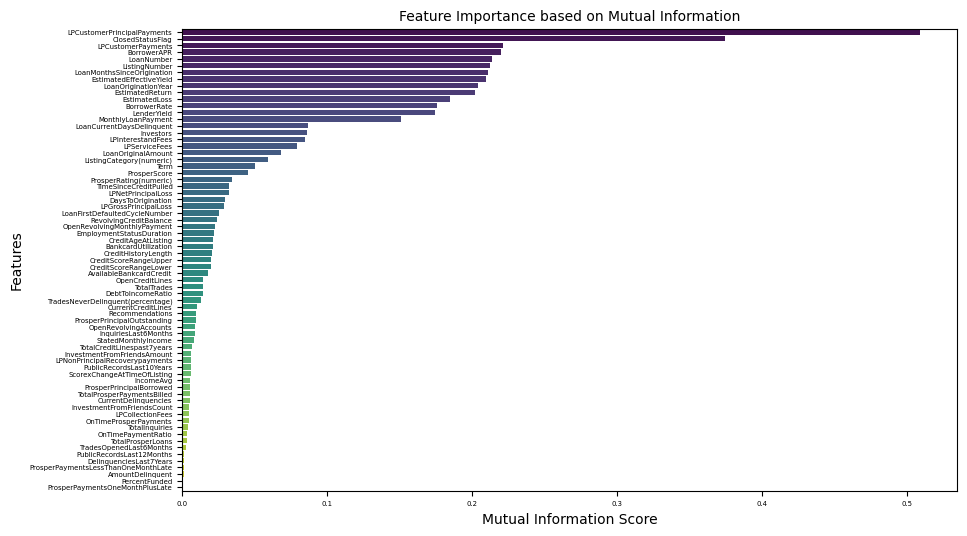

In [141]:
# Plot MI Scores
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores, y=mi_scores.index, palette="viridis")
plt.xlabel("Mutual Information Score",fontsize=10)
plt.ylabel("Features",fontsize=10)
plt.title("Feature Importance based on Mutual Information",fontsize=10)
plt.xticks(fontsize=5)  
plt.yticks(fontsize=5) 
plt.show()

In [142]:
# Drop features with MI score < 0.01
selected_features = mi_scores[mi_scores >= 0.01].index
X_filtered = X[selected_features]  # Keep only selected features

In [143]:
dropped_features = mi_scores[mi_scores < 0.01].index
print("Dropped features:", dropped_features.tolist())

Dropped features: ['Recommendations', 'ProsperPrincipalOutstanding', 'OpenRevolvingAccounts', 'InquiriesLast6Months', 'StatedMonthlyIncome', 'TotalCreditLinespast7years', 'InvestmentFromFriendsAmount', 'LPNonPrincipalRecoverypayments', 'PublicRecordsLast10Years', 'ScorexChangeAtTimeOfListing', 'IncomeAvg', 'ProsperPrincipalBorrowed', 'TotalProsperPaymentsBilled', 'CurrentDelinquencies', 'InvestmentFromFriendsCount', 'LPCollectionFees', 'OnTimeProsperPayments', 'TotalInquiries', 'OnTimePaymentRatio', 'TotalProsperLoans', 'TradesOpenedLast6Months', 'PublicRecordsLast12Months', 'DelinquenciesLast7Years', 'ProsperPaymentsLessThanOneMonthLate', 'AmountDelinquent', 'PercentFunded', 'ProsperPaymentsOneMonthPlusLate']


In [144]:
columns_to_encode = ['LoanOriginationYear', 'ProsperRating(numeric)', 'ListingCategory(numeric)', 'ProsperScore']  
num_data = pd.get_dummies(num_data, columns=columns_to_encode)  # One-hot encode

In [145]:
cat_data.columns

Index(['ListingKey', 'CreditGrade', 'ClosedDate', 'ProsperRating(Alpha)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'IncomeVerifiable', 'LoanKey', 'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')

In [146]:
# Convert empty strings to NaN
cat_data.replace('', np.nan, inplace=True)

# Fill NaNs with mode
for column in cat_data.columns:
    if column != 'IncomeAvg':  
        if cat_data[column].isna().all():  # Skip fully NaN columns
            continue  
        mode_value = cat_data[column].mode()[0]  
        cat_data[column].fillna(mode_value, inplace=True)  


C:\Users\Sc\AppData\Local\Temp\ipykernel_34104\3682867505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data.replace('', np.nan, inplace=True)
C:\Users\Sc\AppData\Local\Temp\ipykernel_34104\3682867505.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[column].fillna(mode_value, inplace=True)
C:\Users\Sc\AppData\Local\Temp\ipykernel_34104\3682867505.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[colum

In [147]:
# Get the count of nulls in each column
null_counts = cat_data.isnull().sum()

# Filter to show only columns with nulls
columns_with_nulls = null_counts[null_counts > 0]

# Print the columns with their null counts
print(columns_with_nulls)


Series([], dtype: int64)


In [148]:
cat_data = pd.get_dummies(cat_data, columns=['LoanOriginationQuarter'], prefix="", prefix_sep="")
cat_data

ListingKey CreditGrade           ClosedDate  \
0       1021339766868145413AB3B           C  2009-08-14 00:00:00   
1       10273602499503308B223C1           C  2014-03-04 00:00:00   
2       0EE9337825851032864889A          HR  2009-12-17 00:00:00   
3       0EF5356002482715299901A           C  2014-03-04 00:00:00   
4       0F023589499656230C5E3E2           C  2014-03-04 00:00:00   
...                         ...         ...                  ...   
113932  E6D9357655724827169606C           C  2014-03-04 00:00:00   
113933  E6DB353036033497292EE43           C  2014-03-04 00:00:00   
113934  E6E13596170052029692BB1           C  2014-03-04 00:00:00   
113935  E6EB3531504622671970D9E           C  2013-08-13 00:00:00   
113936  E6ED3600409833199F711B7           C  2014-03-04 00:00:00   

       ProsperRating(Alpha) BorrowerState               Occupation  \
0                         C            CO                    Other   
1                         A            CO             Professional   
2                         C            GA                    Other   
3                         A            GA            Skilled Labor   
4                         D            MN                Executive   
...                     ...           ...                      ...   
113932                    C            IL  Food Service Management   
113933                    A            PA             Professional   
113934                    D            TX                    Other   
113935                    C            GA             Food Service   
113936                    A            NY                Professor   

       EmploymentStatus  IsBorrowerHomeowner  CurrentlyInGroup  \
0         Self-employed                 True              True   
1              Employed                False             False   
2                 Other                False              True   
3              Employed                 True             False   
4              Employed                 True             False   
...                 ...                  ...               ...   
113932         Employed                 True             False   
113933         Employed                 True             False   
113934         Employed                 True             False   
113935         Employed                 True             False   
113936         Employed                False             False   

                       GroupKey  IncomeVerifiable                  LoanKey  \
0       783C3371218786870A73D20              True  E33A3400205839220442E84   
1       783C3371218786870A73D20              True  9E3B37071505919926B1D82   
2       783C3371218786870A73D20              True  6954337960046817851BCB2   
3       783C3371218786870A73D20              True  A0393664465886295619C51   
4       783C3371218786870A73D20              True  A180369302188889200689E   
...                         ...               ...                      ...   
113932  783C3371218786870A73D20              True  9BD7367919051593140DB62   
113933  783C3371218786870A73D20              True  62D93634569816897D5A276   
113934  783C3371218786870A73D20              True  DD1A370200396006300ACA0   
113935  783C3371218786870A73D20              True  589536350469116027ED11B   
113936  783C3371218786870A73D20              True  00AF3704550953269A64E40   

                      MemberKey  Q1  Q2  Q3  Q4  
0       1F3E3376408759268057EDA   0   0   1   0  
1       1D13370546739025387B2F4   1   0   0   0  
2       5F7033715035555618FA612   1   0   0   0  
3       9ADE356069835475068C6D2   0   0   0   1  
4       36CE356043264555721F06C   0   0   1   0  
...                         ...  ..  ..  ..  ..  
113932  2EC435768441332602FDC15   0   1   0   0  
113933  55C4336679182766893E4FC   0   0   0   1  
113934  0FE0370029359765342FDB5   0   0   0   1  
113935  A33834861822272782621C8   0   0   0   1  
113936  CE1E3704648000761C9F724   1   0   0   0  

[113937 rows x 17 columns]

In [149]:
# Columns to apply Label Encoding
label_encode_cols = ['IncomeVerifiable', 'CurrentlyInGroup', 'IsBorrowerHomeowner']  

# Apply Label Encoding to selected columns
label_encoder = LabelEncoder()
for col in label_encode_cols:
    cat_data[col] = label_encoder.fit_transform(cat_data[col])

In [150]:
# Get the count of nulls in each column
null_counts = cat_data.isnull().sum()

# Filter to show only columns with nulls
columns_with_nulls = null_counts[null_counts > 0]

# Print the columns with their null counts
print(columns_with_nulls)


Series([], dtype: int64)


In [151]:
def one_hot_encode_selected(cat_data, columns_to_encode):

  df_encoded = pd.get_dummies(cat_data, columns=columns_to_encode) 
  return df_encoded

# Specify columns to one-hot encode
columns_to_encode = ['CreditGrade','ProsperRating(Alpha)','BorrowerState','Occupation','EmploymentStatus'] 
cat_data = one_hot_encode_selected(cat_data, columns_to_encode)

In [153]:
# Concatenate both processed parts
final_df = pd.concat([cat_data,num_data,date_data], axis=1)

# Convert to DataFrame
Processed_df = pd.DataFrame(final_df)

Processed_df.head()

ListingKey           ClosedDate  IsBorrowerHomeowner  \
0  1021339766868145413AB3B  2009-08-14 00:00:00                    1   
1  10273602499503308B223C1  2014-03-04 00:00:00                    0   
2  0EE9337825851032864889A  2009-12-17 00:00:00                    0   
3  0EF5356002482715299901A  2014-03-04 00:00:00                    1   
4  0F023589499656230C5E3E2  2014-03-04 00:00:00                    1   

   CurrentlyInGroup                 GroupKey  IncomeVerifiable  \
0                 1  783C3371218786870A73D20                 1   
1                 0  783C3371218786870A73D20                 1   
2                 1  783C3371218786870A73D20                 1   
3                 0  783C3371218786870A73D20                 1   
4                 0  783C3371218786870A73D20                 1   

                   LoanKey                MemberKey  Q1  Q2  ...  \
0  E33A3400205839220442E84  1F3E3376408759268057EDA   0   0  ...   
1  9E3B37071505919926B1D82  1D13370546739025387B2F4   1   0  ...   
2  6954337960046817851BCB2  5F7033715035555618FA612   1   0  ...   
3  A0393664465886295619C51  9ADE356069835475068C6D2   0   0  ...   
4  A180369302188889200689E  36CE356043264555721F06C   0   0  ...   

   ProsperScore_5.0  ProsperScore_6.0  ProsperScore_7.0  ProsperScore_8.0  \
0                 0                 0                 0                 0   
1                 0                 0                 1                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   ProsperScore_9.0  ProsperScore_10.0     ListingCreationDate  \
0                 0                  0 2007-08-26 19:09:29.263   
1                 0                  0 2014-02-27 08:28:07.900   
2                 0                  0 2007-01-05 15:00:47.090   
3                 1                  0 2012-10-22 11:02:35.010   
4                 0                  0 2013-09-14 18:38:39.097   

         DateCreditPulled  FirstRecordedCreditLine  LoanOriginationDate  
0 2007-08-26 18:41:46.780               2001-10-11           2007-09-12  
1 2014-02-27 08:28:14.000               1996-03-18           2014-03-03  
2 2007-01-02 14:09:10.060               2002-07-27           2007-01-17  
3 2012-10-22 11:02:32.000               1983-02-28           2012-11-01  
4 2013-09-14 18:38:44.000               2004-02-20           2013-09-20  

[5 rows x 261 columns]

In [154]:
pca_df=pd.concat([cat_data,final_num_data,date_data], axis=1)

In [155]:
Processed_df.to_csv(r'C:\Users\Sc\OneDrive - Faculty of Computer and Information Sciences (Ain Shams University)\Desktop\Material\processed_bondora_data.csv', index=False)  # Windows

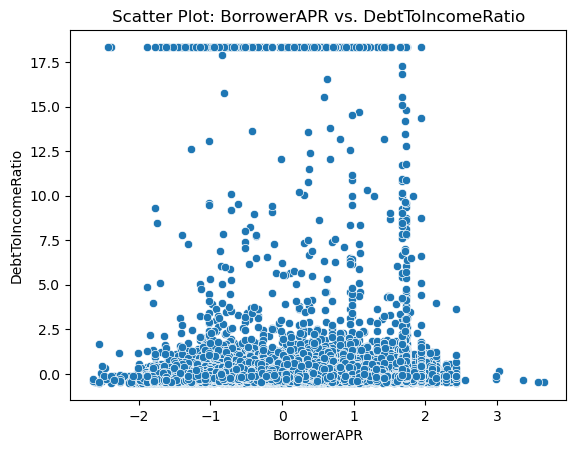

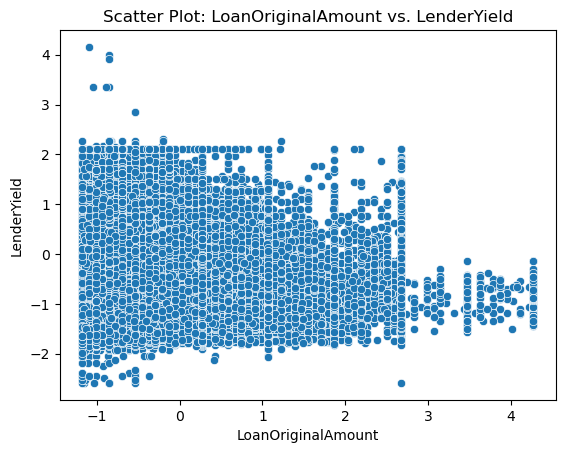

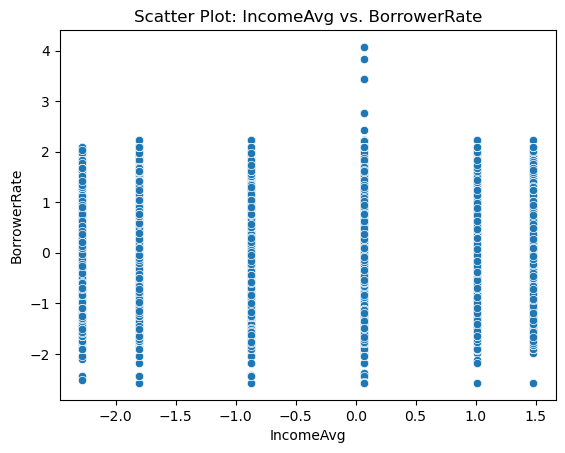

C:\Users\Sc\AppData\Local\Temp\ipykernel_34104\3110093572.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop(columns=columns_to_remove).corr()


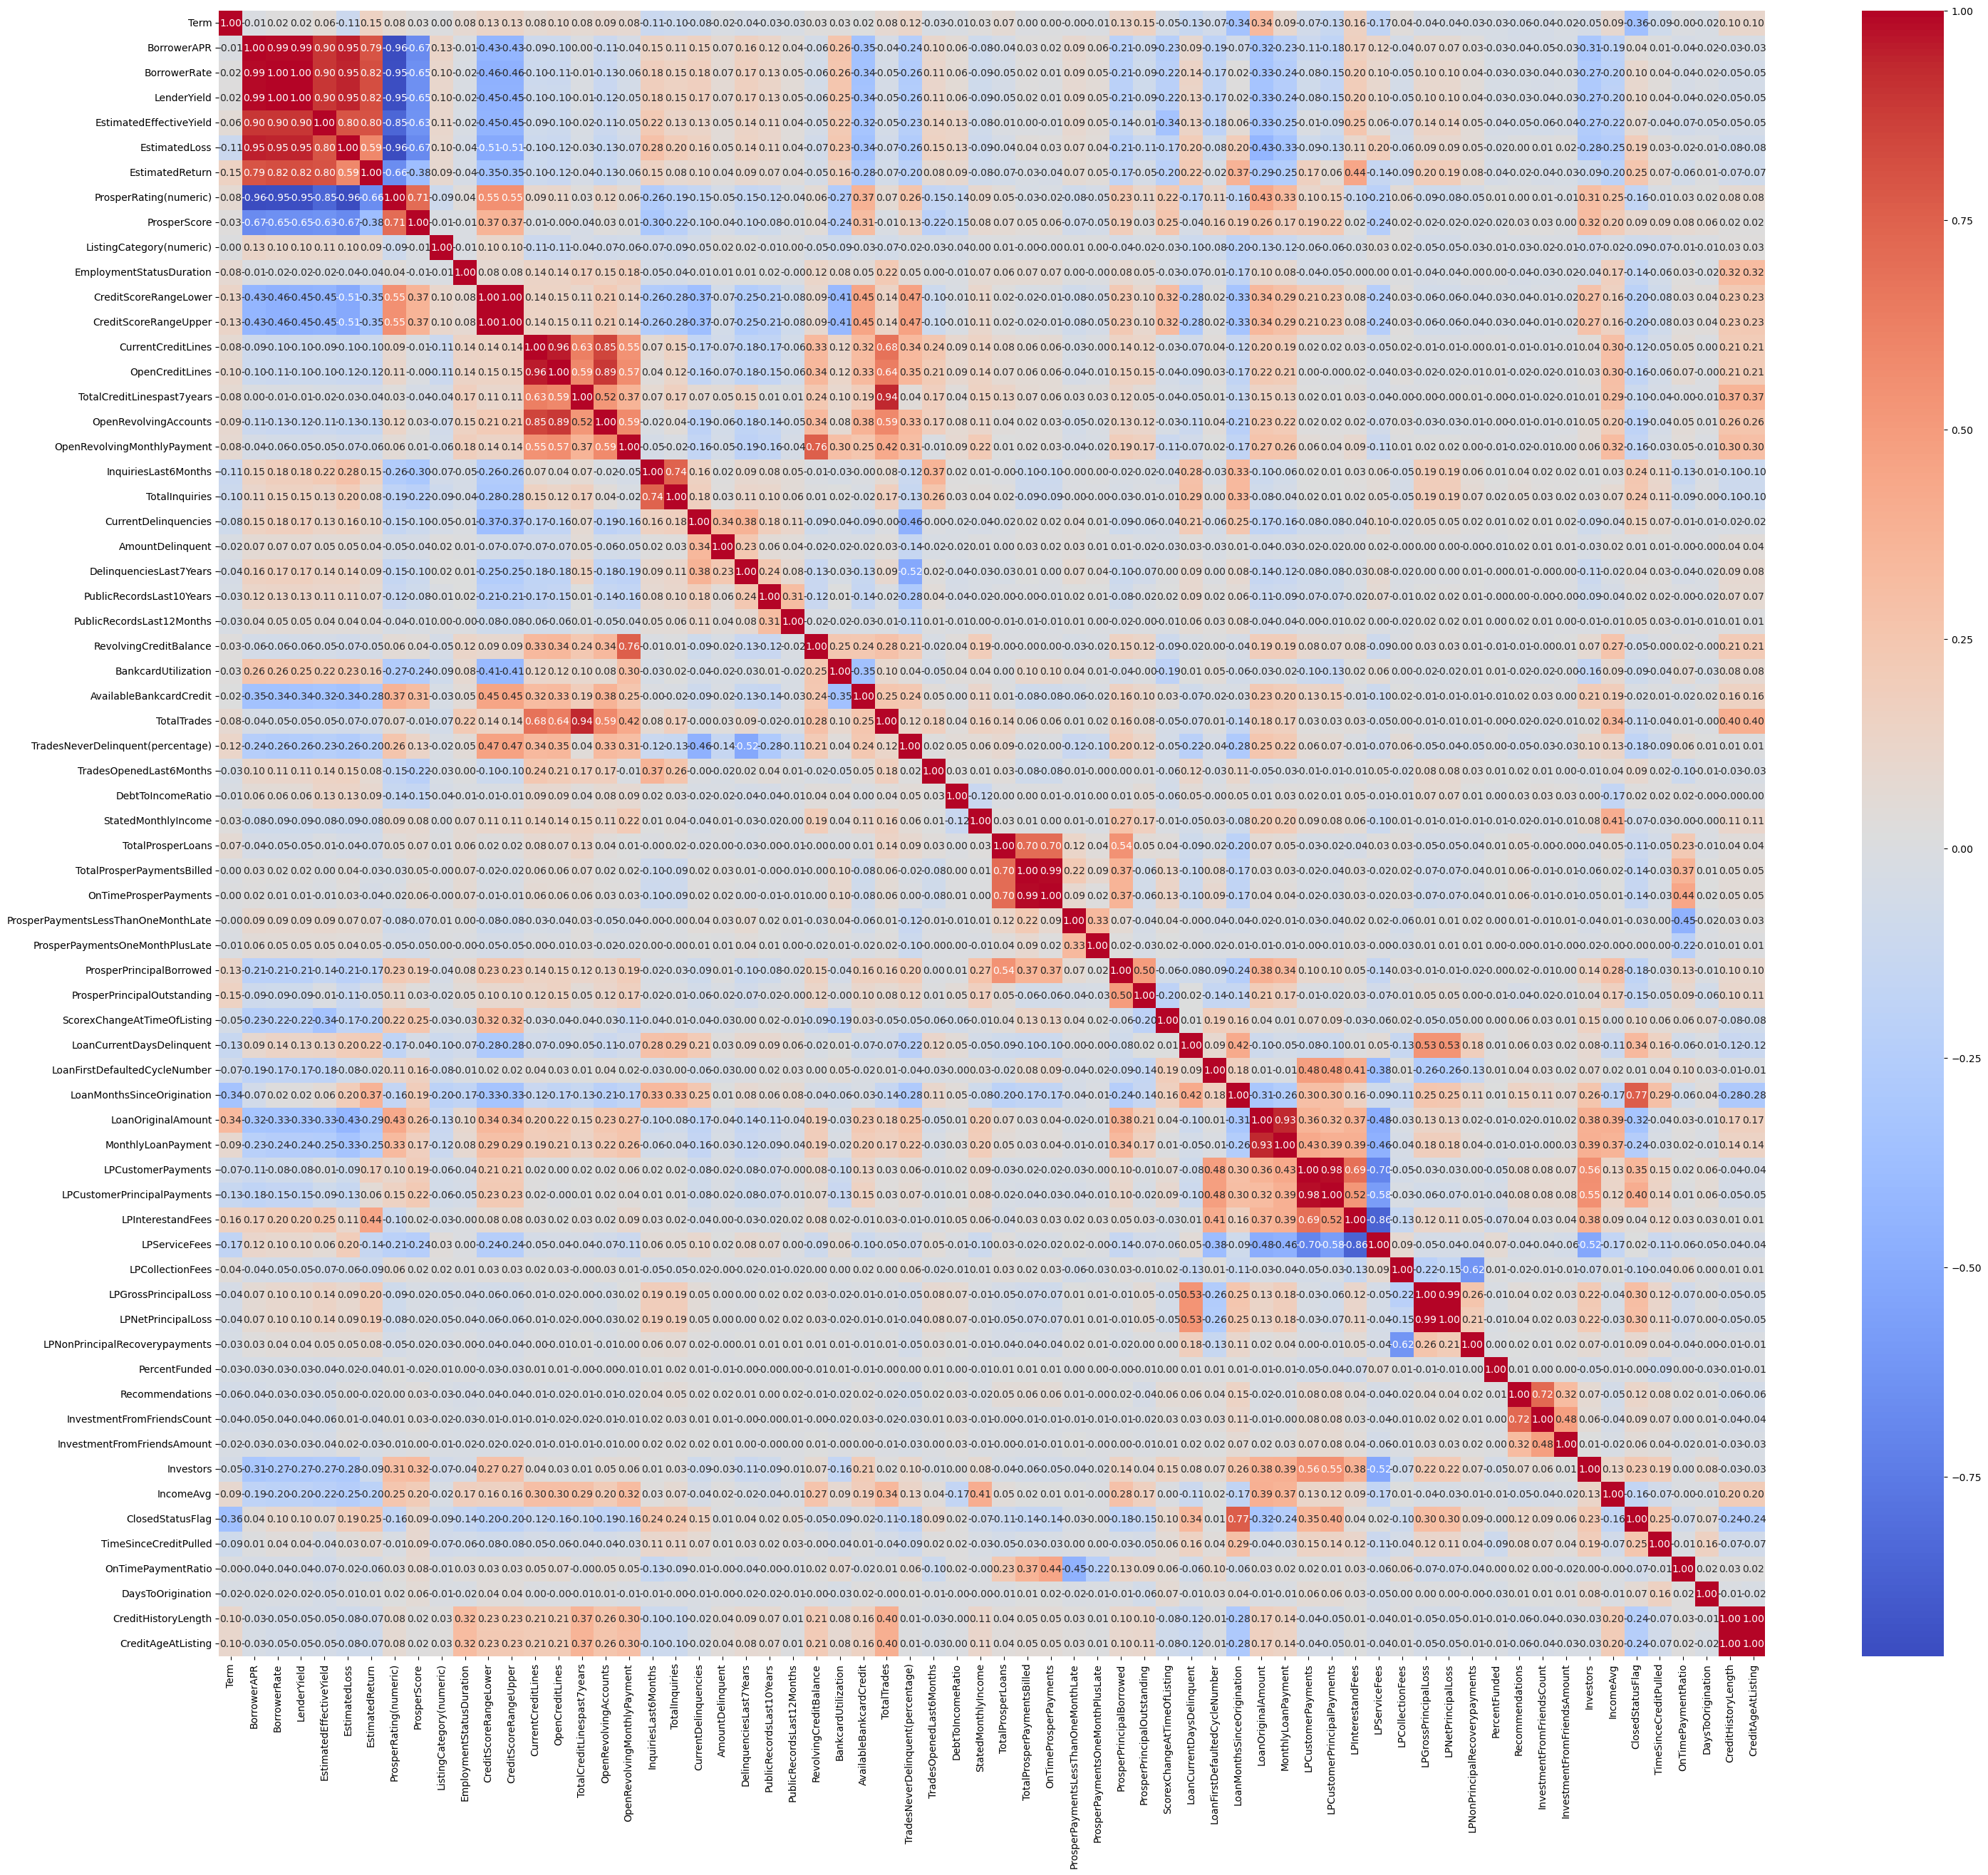

In [156]:
# Scatter plot: Relationship between two numerical features
sns.scatterplot(data=num_data, x="BorrowerAPR", y="DebtToIncomeRatio")
plt.title("Scatter Plot: BorrowerAPR vs. DebtToIncomeRatio")
plt.show()

# Scatter plot: Relationship between two numerical features
sns.scatterplot(data=num_data, x="LoanOriginalAmount", y="LenderYield")
plt.title("Scatter Plot: LoanOriginalAmount vs. LenderYield")
plt.show()

# Scatter plot: Relationship between two numerical features
sns.scatterplot(data=num_data, x="IncomeAvg", y="BorrowerRate")
plt.title("Scatter Plot: IncomeAvg vs. BorrowerRate")
plt.show()

# List of columns to remove
columns_to_remove = ['ListingNumber', 'LoanNumber', 'LoanStatus','LoanOriginationYear','IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable']  # Modify as needed

# Compute correlation matrix without those columns
correlation_matrix = df.drop(columns=columns_to_remove).corr()

# Plot the heatmap
plt.figure(figsize=(35, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.xticks(rotation=90)
plt.show()


In [157]:
Processed_df.describe()

IsBorrowerHomeowner  CurrentlyInGroup  IncomeVerifiable             Q1  \
count        113937.000000     113937.000000     113937.000000  113937.000000   
mean              0.504472          0.111632          0.923914       0.260477   
std               0.499982          0.314914          0.265137       0.438897   
min               0.000000          0.000000          0.000000       0.000000   
25%               0.000000          0.000000          1.000000       0.000000   
50%               1.000000          0.000000          1.000000       0.000000   
75%               1.000000          0.000000          1.000000       1.000000   
max               1.000000          1.000000          1.000000       1.000000   

                  Q2             Q3             Q4  CreditGrade_A  \
count  113937.000000  113937.000000  113937.000000  113937.000000   
mean        0.218594       0.245460       0.275468       0.029095   
std         0.413295       0.430362       0.446752       0.168074   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       CreditGrade_AA  CreditGrade_B  ...  ProsperScore_1.0  ProsperScore_2.0  \
count   113937.000000  113937.000000  ...     113937.000000     113937.000000   
mean         0.030798       0.038521  ...          0.008707          0.050607   
std          0.172770       0.192452  ...          0.092902          0.219195   
min          0.000000       0.000000  ...          0.000000          0.000000   
25%          0.000000       0.000000  ...          0.000000          0.000000   
50%          0.000000       0.000000  ...          0.000000          0.000000   
75%          0.000000       0.000000  ...          0.000000          0.000000   
max          1.000000       1.000000  ...          1.000000          1.000000   

       ProsperScore_3.0  ProsperScore_4.0  ProsperScore_5.0  ProsperScore_6.0  \
count     113937.000000     113937.000000     113937.000000     113937.000000   
mean           0.067072          0.365807          0.086127          0.107761   
std            0.250148          0.481658          0.280552          0.310080   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          1.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       ProsperScore_7.0  ProsperScore_8.0  ProsperScore_9.0  ProsperScore_10.0  
count     113937.000000     113937.000000     113937.000000      113937.000000  
mean           0.093008          0.105787          0.060656           0.054469  
std            0.290444          0.307566          0.238700           0.226941  
min            0.000000          0.000000          0.000000           0.000000  
25%            0.000000          0.000000          0.000000           0.000000  
50%            0.000000          0.000000          0.000000           0.000000  
75%            0.000000          0.000000          0.000000           0.000000  
max            1.000000          1.000000          1.000000           1.000000  

[8 rows x 252 columns]

In [158]:
Processed_df.describe(include='object')

ListingKey           ClosedDate                 GroupKey  \
count                    113937               113937                   113937   
unique                   113066                 2802                      706   
top     17A93590655669644DB4C06  2014-03-04 00:00:00  783C3371218786870A73D20   
freq                          6                58953                   101736   

                        LoanKey                MemberKey  
count                    113937                   113937  
unique                   113066                    90831  
top     CB1B37030986463208432A1  63CA34120866140639431C9  
freq                          6                        9

In [159]:
Processed_df.info()
# Summarize data types
Processed_df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Columns: 261 entries, ListingKey to LoanOriginationDate
dtypes: datetime64[ns](4), float64(63), int64(6), object(5), uint8(183)
memory usage: 87.7+ MB


uint8             183
float64            63
int64               6
object              5
datetime64[ns]      4
dtype: int64

In [160]:
Processed_df.columns

Index(['ListingKey', 'ClosedDate', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'GroupKey', 'IncomeVerifiable', 'LoanKey', 'MemberKey', 'Q1', 'Q2',
       ...
       'ProsperScore_5.0', 'ProsperScore_6.0', 'ProsperScore_7.0',
       'ProsperScore_8.0', 'ProsperScore_9.0', 'ProsperScore_10.0',
       'ListingCreationDate', 'DateCreditPulled', 'FirstRecordedCreditLine',
       'LoanOriginationDate'],
      dtype='object', length=261)

In [161]:
# Calculate missing value percentage
missing_percent = (Processed_df.isnull().sum() / len(Processed_df)) * 100

# Filter only columns with missing values
missing_percent = missing_percent[missing_percent > 0]

# Display results
print(missing_percent.sort_values(ascending=False))

Series([], dtype: float64)


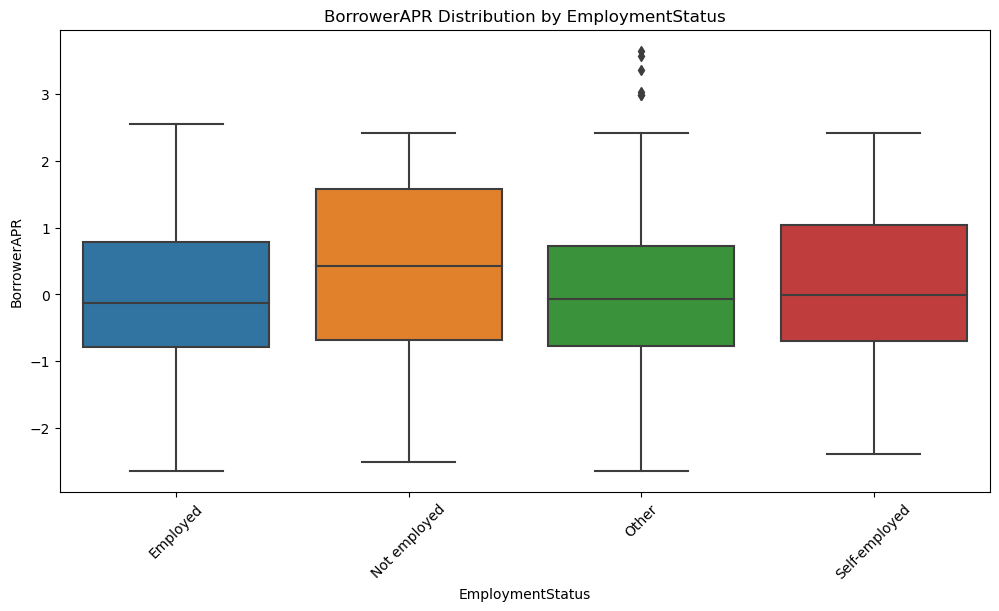

In [162]:
def plot_borrower_apr_by_employment_status(df):

    # Get the one-hot encoded columns for EmploymentStatus
    employment_status_cols = [col for col in df.columns if col.startswith('EmploymentStatus_')]

    if not employment_status_cols:
        print("No EmploymentStatus columns found. Please check the column names.")
        return

    # Melt the DataFrame to long format
    melted_df = pd.melt(df, 
                       id_vars=['BorrowerAPR'], 
                       value_vars=employment_status_cols, 
                       var_name='EmploymentStatus', 
                       value_name='IsEmployed')

    # Filter for rows where IsEmployed is 1 (indicating the specific employment status)
    melted_df = melted_df[melted_df['IsEmployed'] == 1]

    # Extract employment status from column name
    melted_df['EmploymentStatus'] = melted_df['EmploymentStatus'].str.replace('EmploymentStatus_', '', regex=False)

    # Create the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="EmploymentStatus", y="BorrowerAPR", data=melted_df)
    plt.title("BorrowerAPR Distribution by EmploymentStatus")
    plt.xticks(rotation=45)
    plt.show()

plot_borrower_apr_by_employment_status(Processed_df)

In [163]:
# Insights:
# Employment Status Impacts Risk: The plot reveals that employment status significantly influences BorrowerAPR. Self-employed individuals tend to have higher and more variable interest rates compared to employed individuals.

# Recommendations: 
# Lenders should consider employment status as a factor in their risk assessment models and adjust lending terms accordingly.

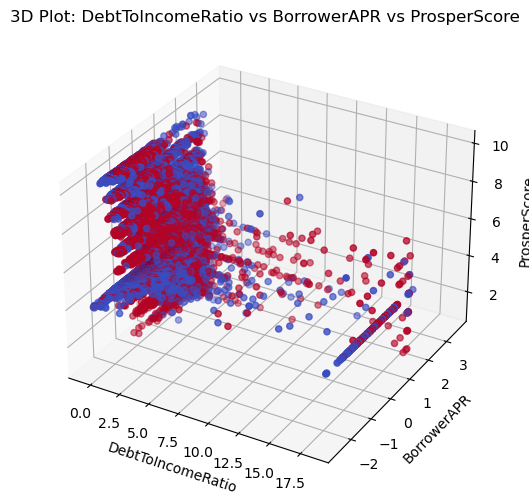

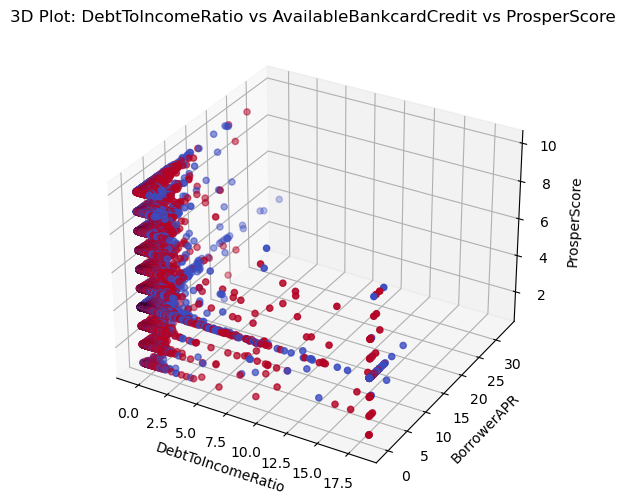

In [164]:
def plot_3d_scatter(df):

    # Handle one-hot encoded ProsperScore
    prosper_score_cols = [col for col in Processed_df.columns if col.startswith('ProsperScore_')]
    df['ProsperScore'] = df[prosper_score_cols].idxmax(axis=1).str.replace('ProsperScore_', '').astype(float) 

    # Create the 3D plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(Processed_df["DebtToIncomeRatio"], Processed_df["BorrowerAPR"], Processed_df['ProsperScore'], 
               c=df["LoanStatus"], cmap="coolwarm")
    ax.set_xlabel("DebtToIncomeRatio")
    ax.set_ylabel("BorrowerAPR")
    ax.set_zlabel("ProsperScore")
    plt.title("3D Plot: DebtToIncomeRatio vs BorrowerAPR vs ProsperScore")
    plt.show()

plot_3d_scatter(Processed_df)


def plot_3d_scatter(df):

    # Handle one-hot encoded ProsperScore
    prosper_score_cols = [col for col in Processed_df.columns if col.startswith('ProsperScore_')]
    df['ProsperScore'] = df[prosper_score_cols].idxmax(axis=1).str.replace('ProsperScore_', '').astype(float) 

    # Create the 3D plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(Processed_df["DebtToIncomeRatio"], Processed_df["AvailableBankcardCredit"], Processed_df['ProsperScore'], 
               c=df["LoanStatus"], cmap="coolwarm")
    ax.set_xlabel("DebtToIncomeRatio")
    ax.set_ylabel("BorrowerAPR")
    ax.set_zlabel("ProsperScore")
    plt.title("3D Plot: DebtToIncomeRatio vs AvailableBankcardCredit vs ProsperScore")
    plt.show()

plot_3d_scatter(Processed_df)



In [165]:
# 1st 3D plot
# Insights:
# Risk Stratification: The plot helps visualize how DebtToIncomeRatio, BorrowerAPR, and ProsperScore interact to influence lending risk. Borrowers with high DebtToIncomeRatio, high BorrowerAPR, and low ProsperScore likely pose the highest risk.
# Targeted Lending: Lenders can use the plot to identify lower-risk borrowers (e.g., those with low DebtToIncomeRatio, low BorrowerAPR, and high ProsperScore) and offer them more competitive rates.

# Recommendations:
# Risk Assessment: Consider DebtToIncomeRatio, BorrowerAPR, and ProsperScore together when assessing lending risk.
# Targeted Lending: Offer more competitive rates to borrowers with low DebtToIncomeRatio, low BorrowerAPR, and high ProsperScore.

# 2nd 3D plot
# Insights:
# High DebtToIncomeRatio, low AvailableBankcardCredit, and low ProsperScore indicate higher risk.
# ProsperScore is a crucial factor in differentiating borrowers with similar DebtToIncomeRatio and AvailableBankcardCredit.

# Recommendations:
# Develop risk scoring models that incorporate all three variables.
# Implement tiered pricing based on the combination of these factors.
# Target marketing efforts towards borrowers with lower DebtToIncomeRatio, higher AvailableBankcardCredit, and higher ProsperScore.

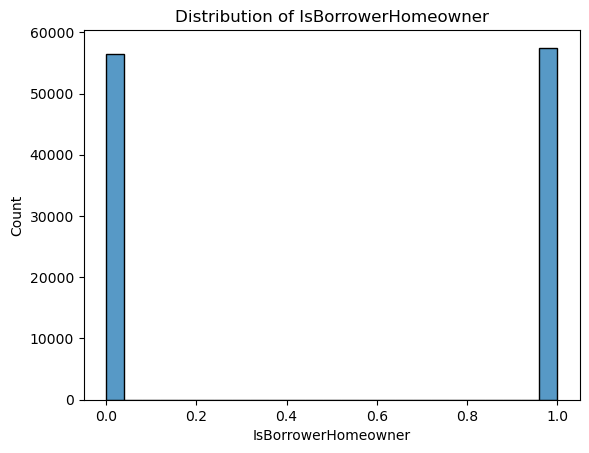

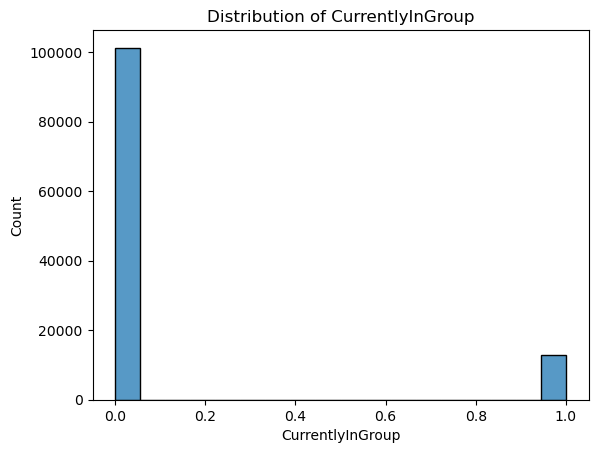

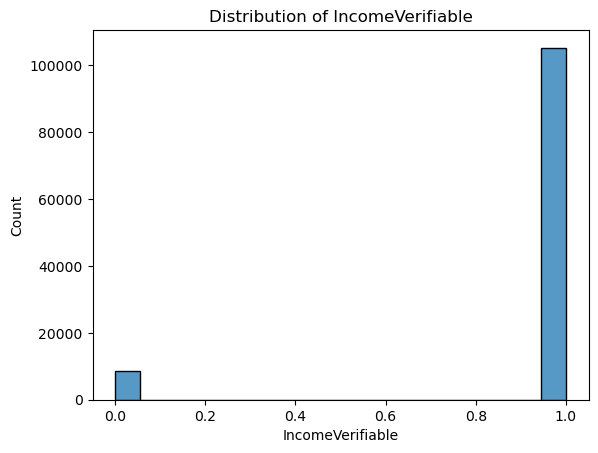

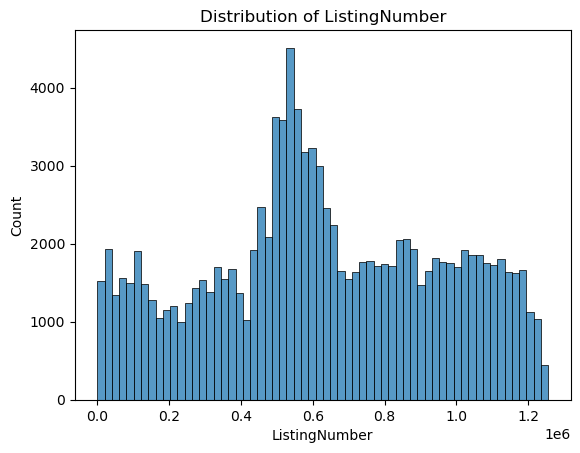

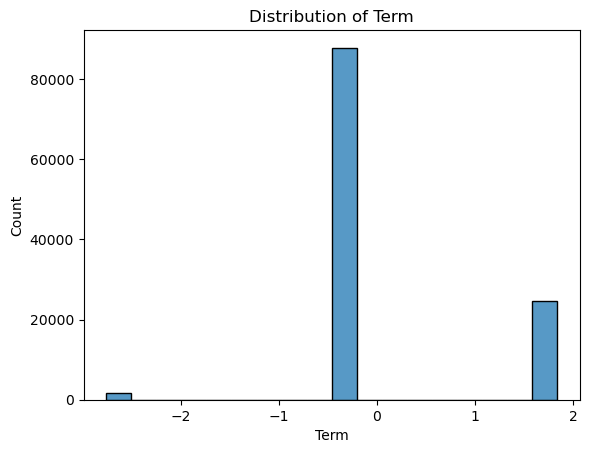

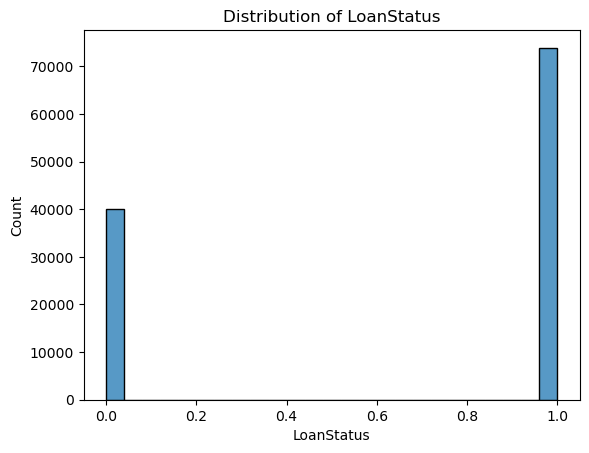

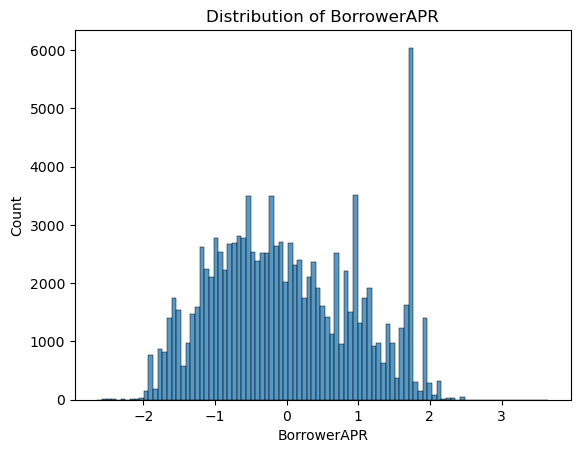

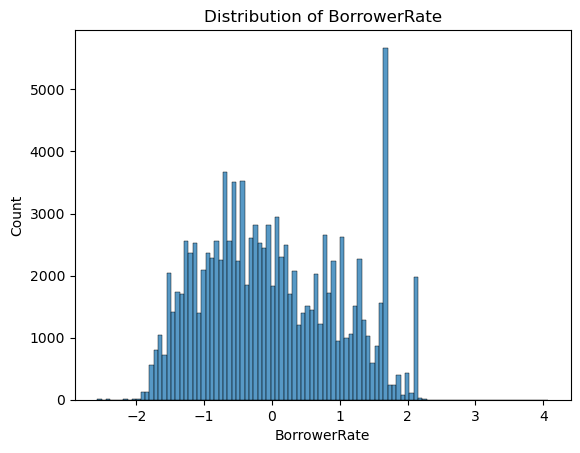

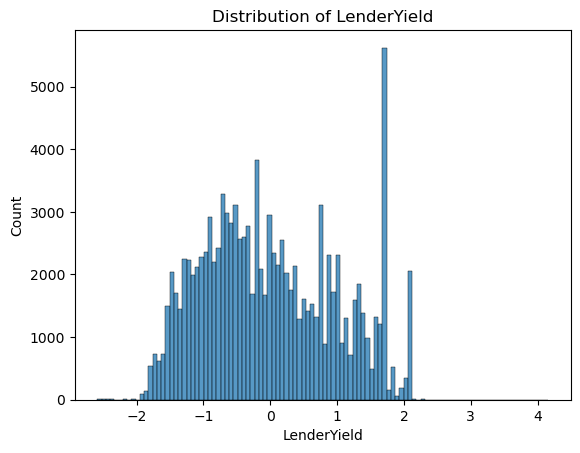

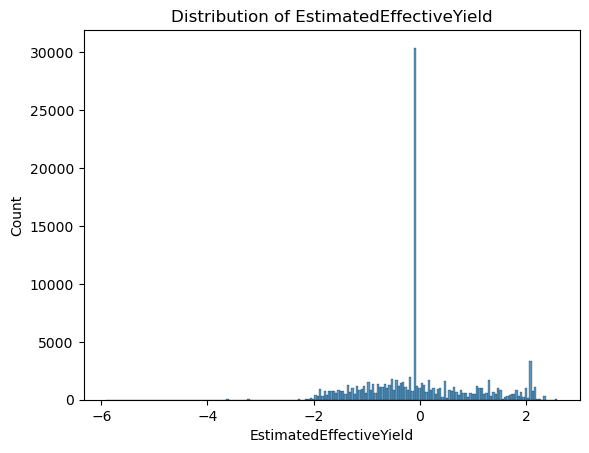

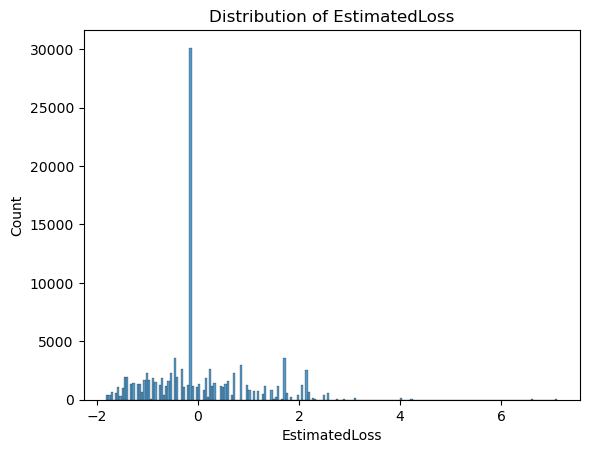

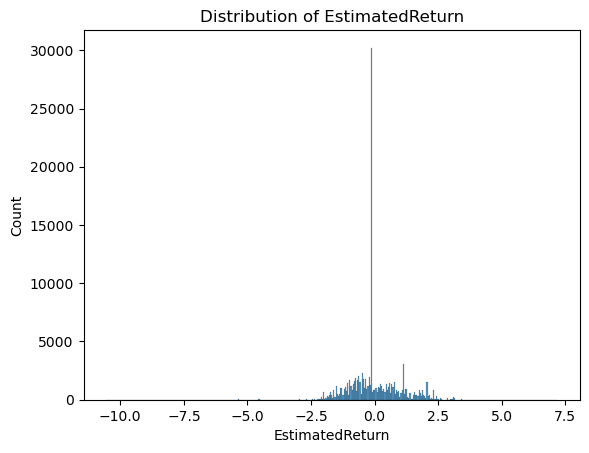

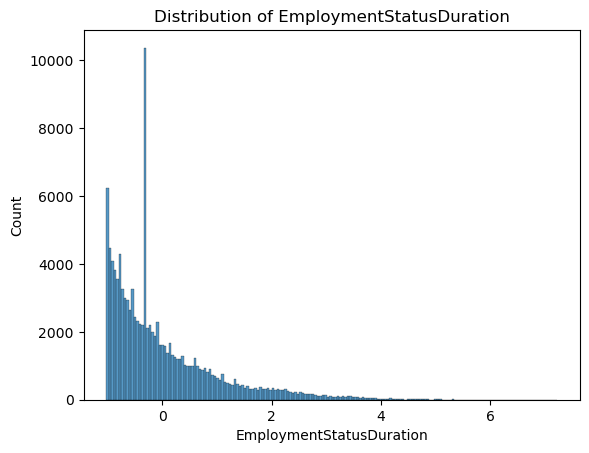

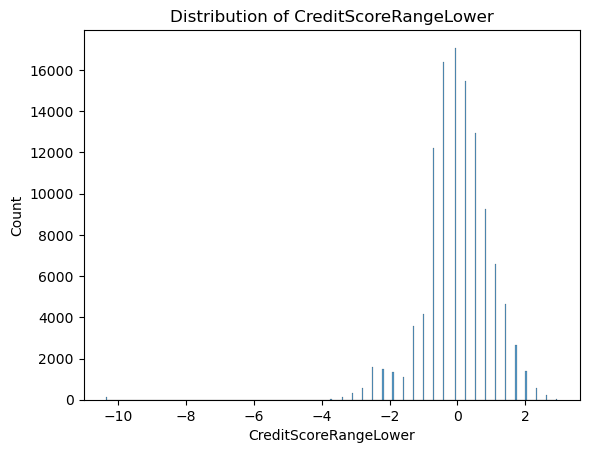

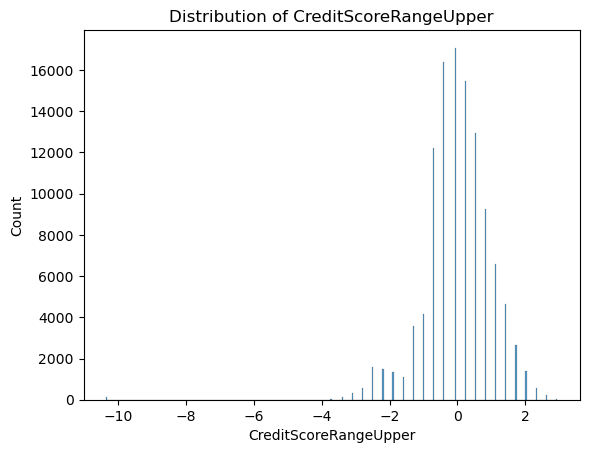

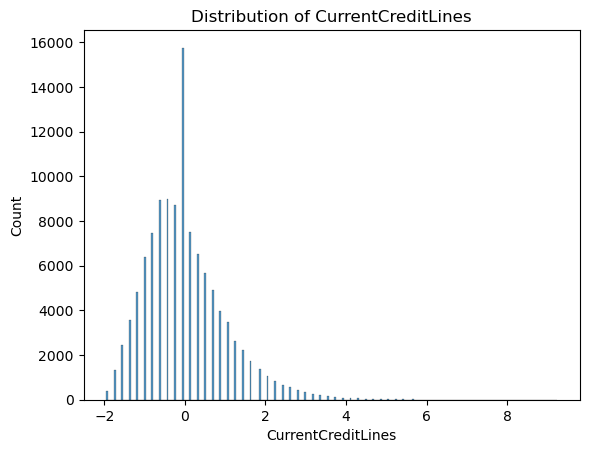

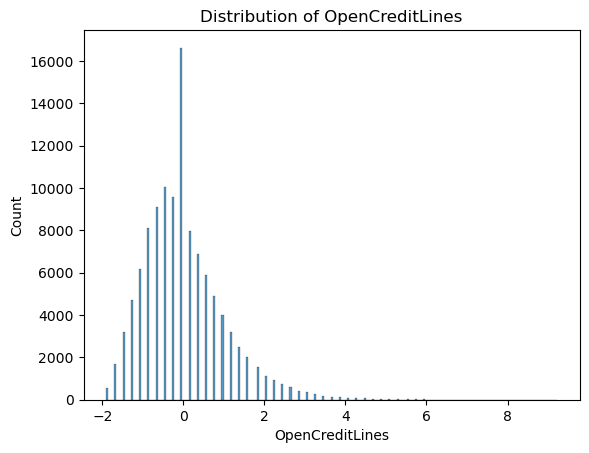

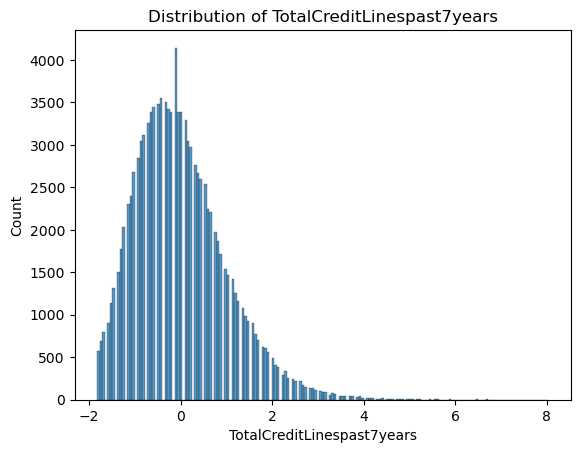

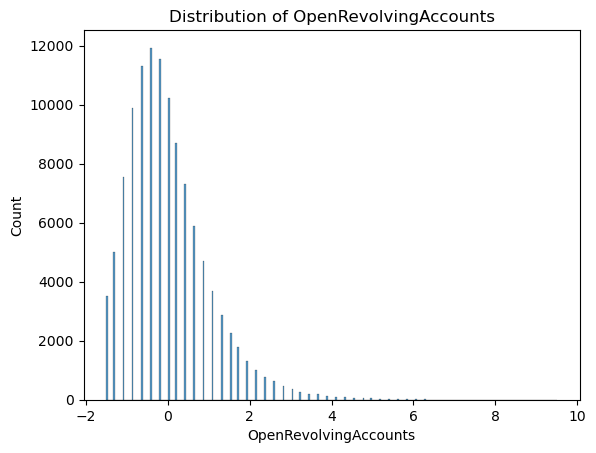

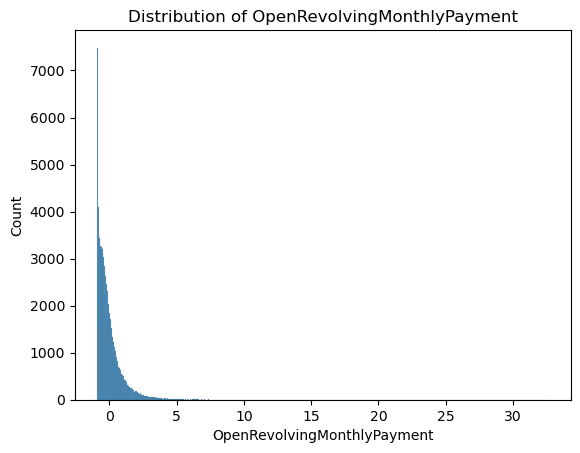

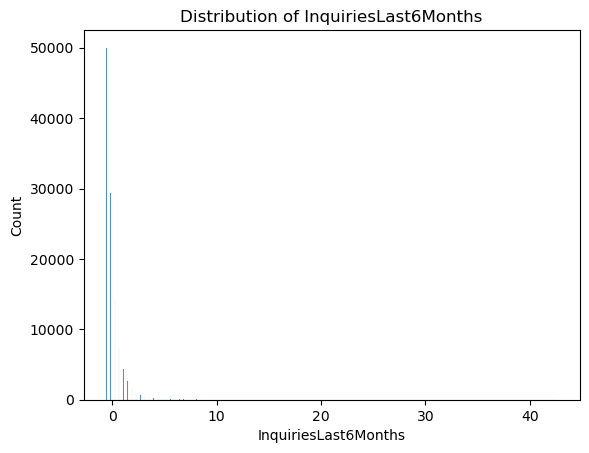

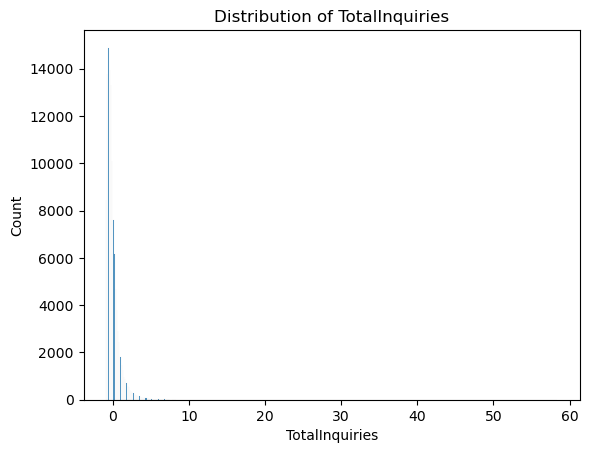

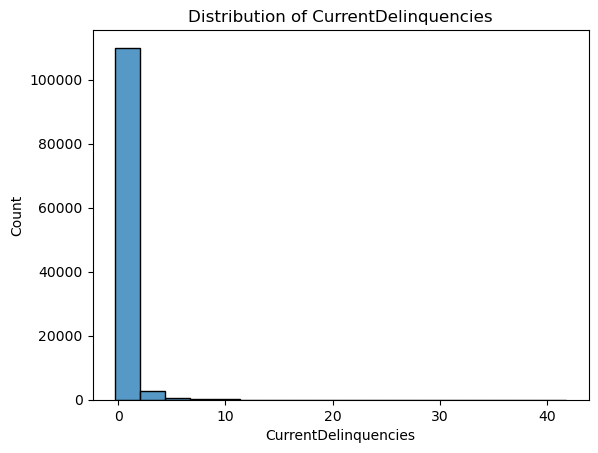

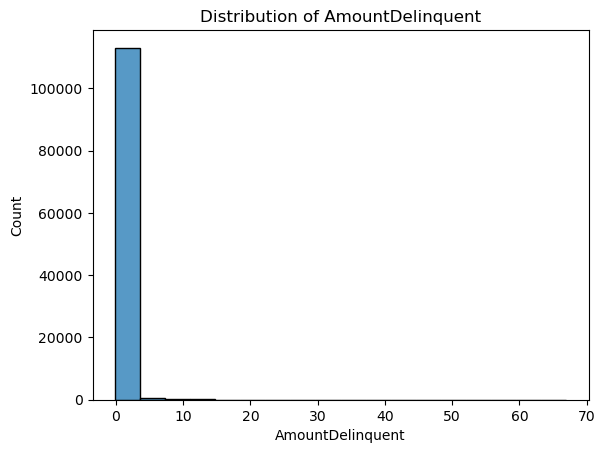

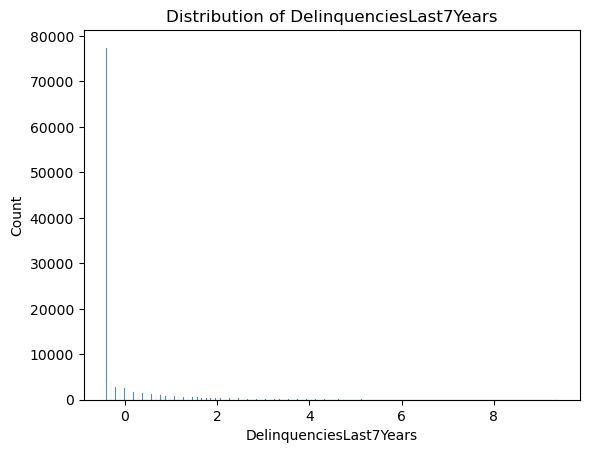

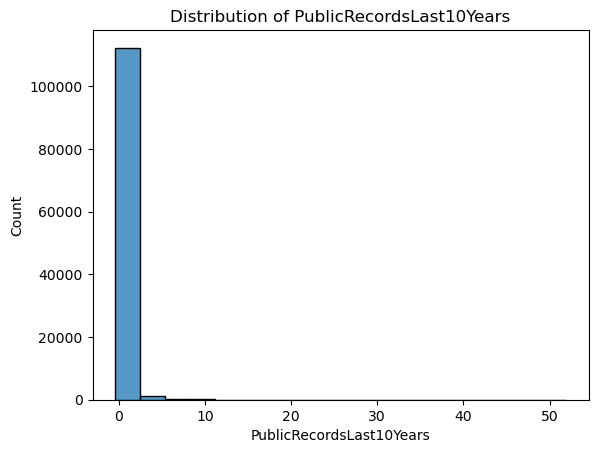

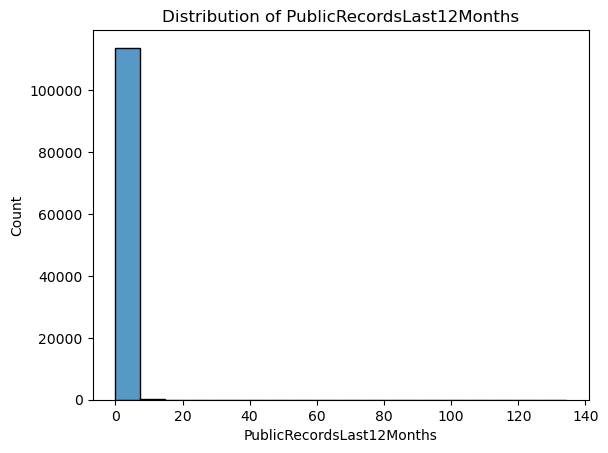

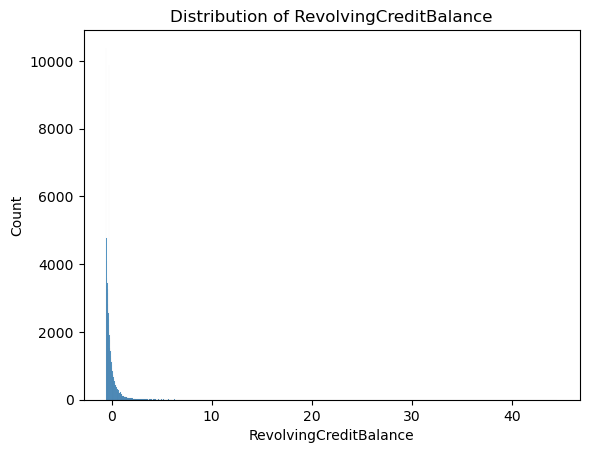

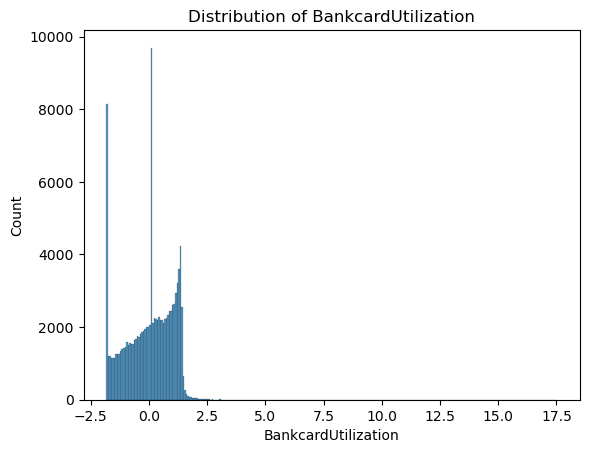

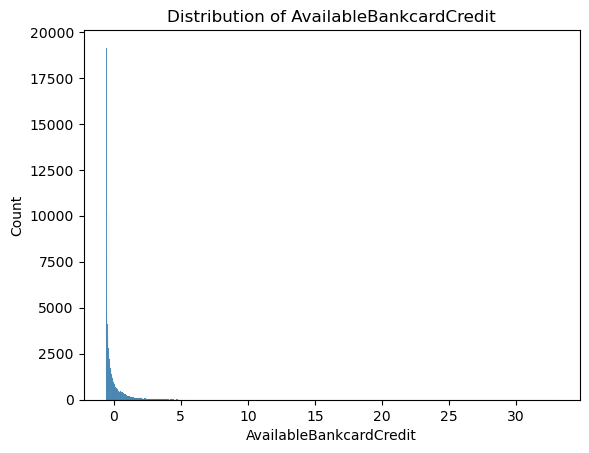

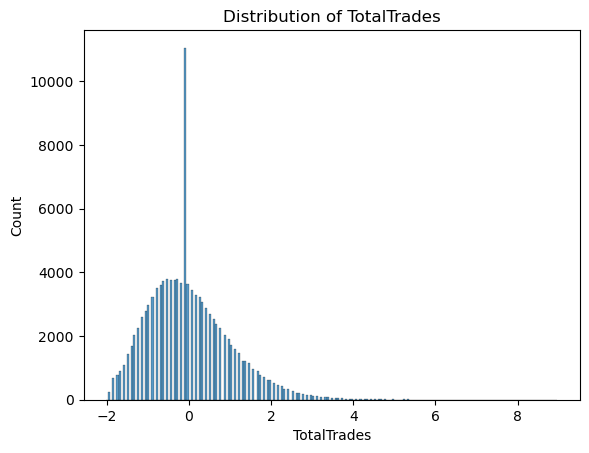

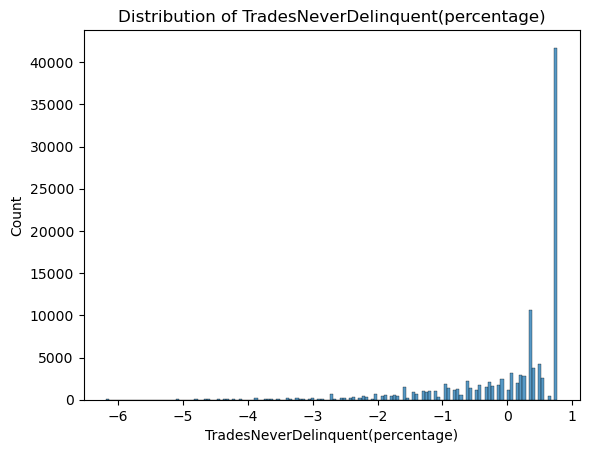

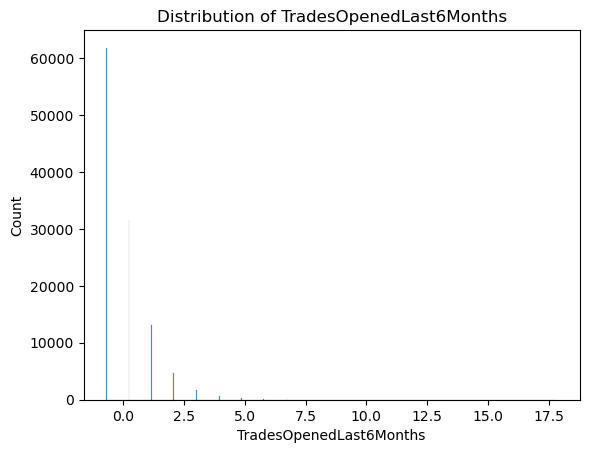

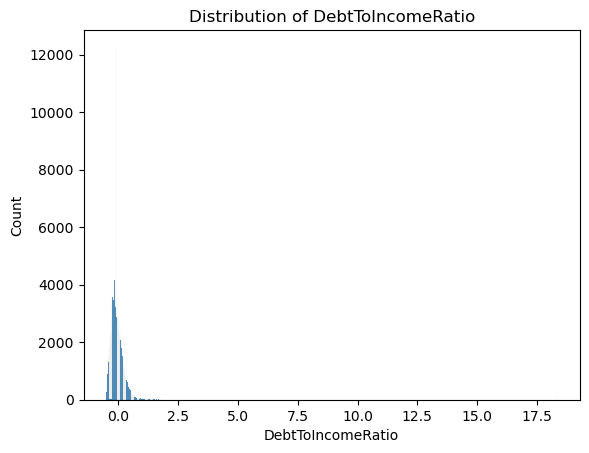

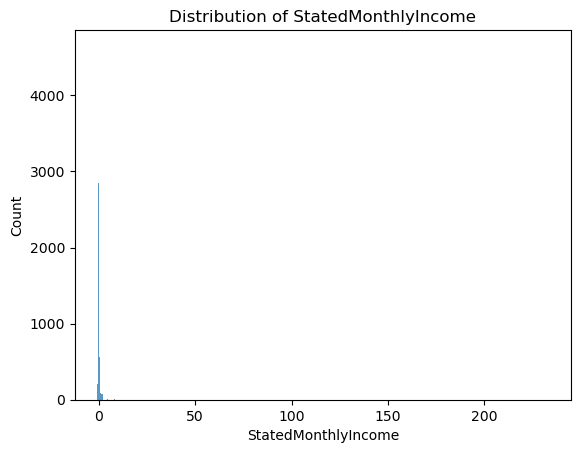

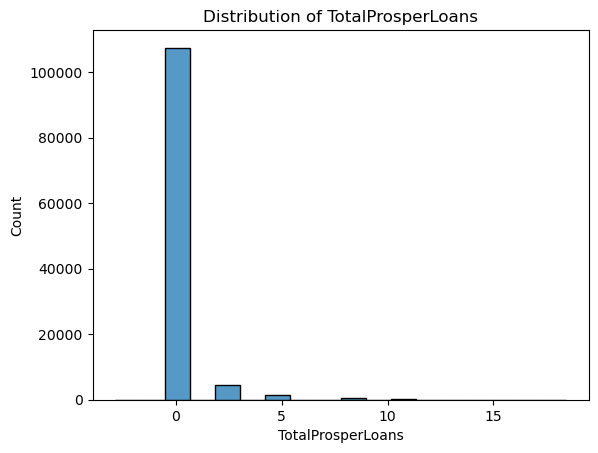

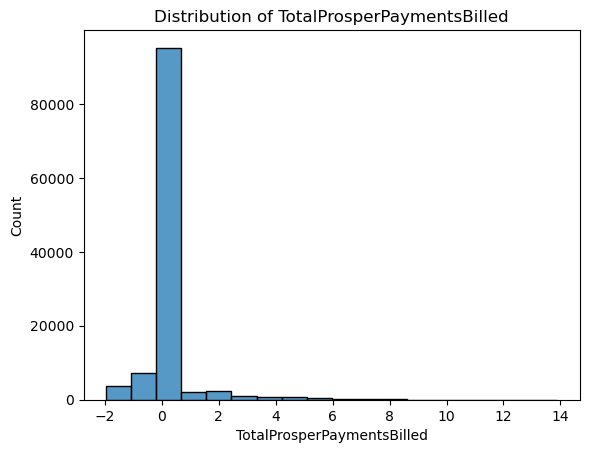

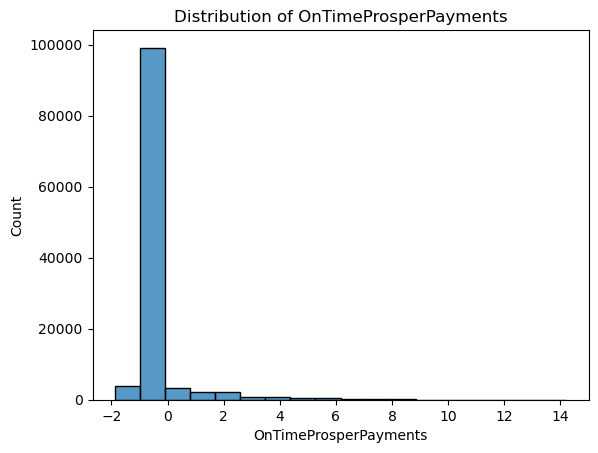

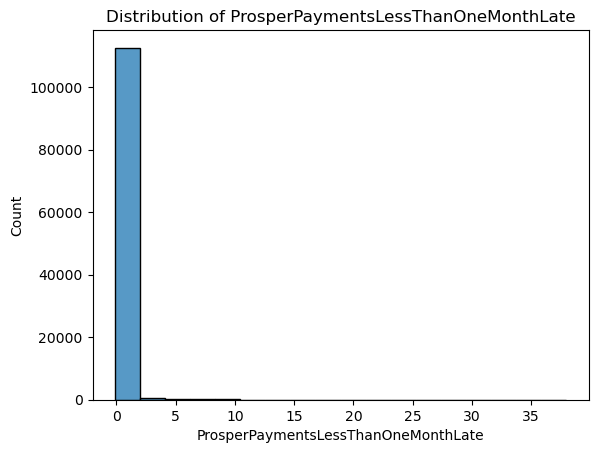

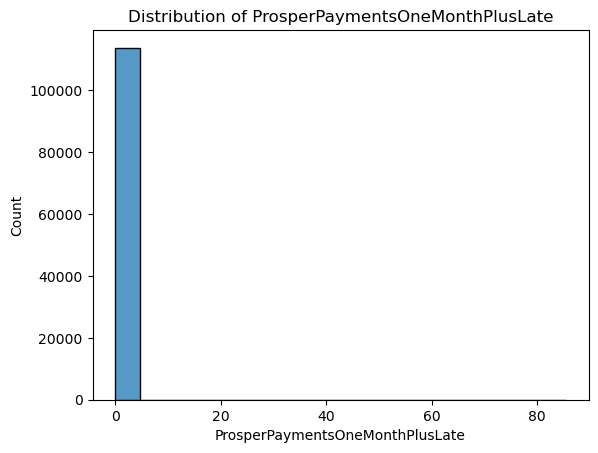

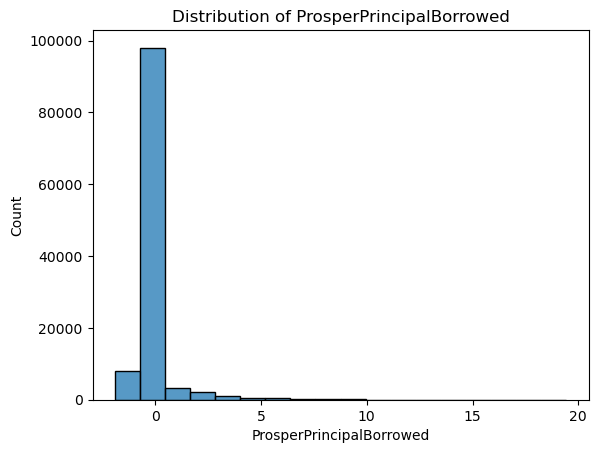

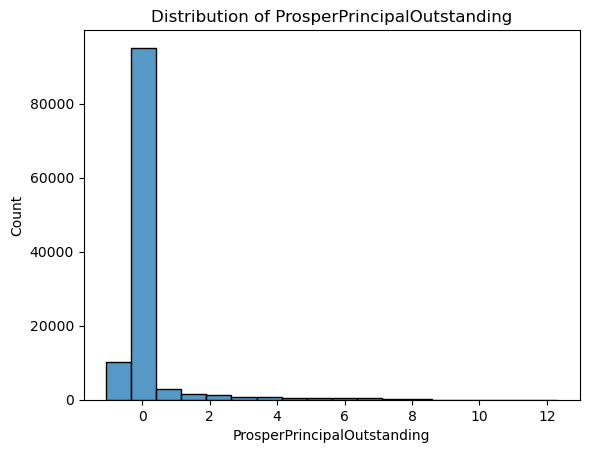

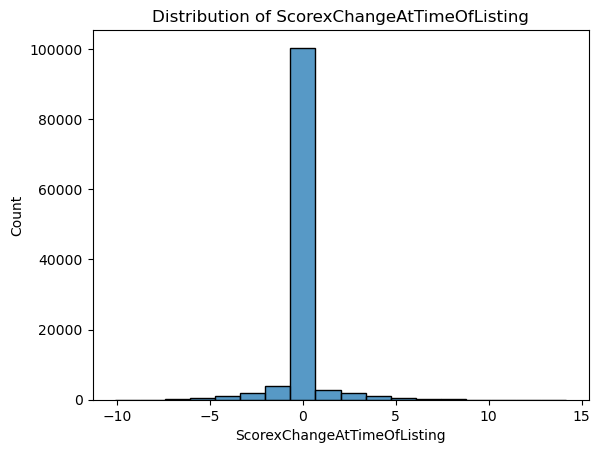

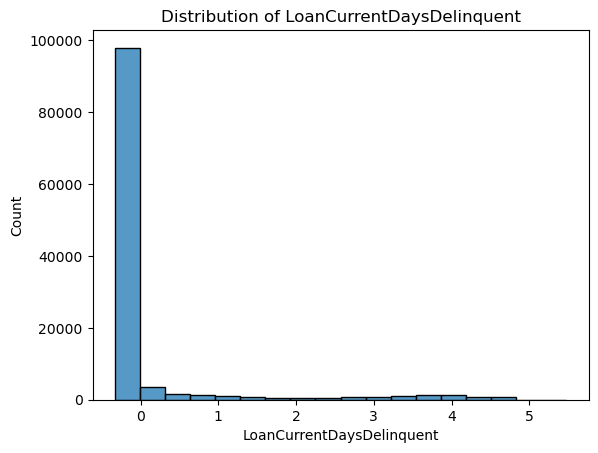

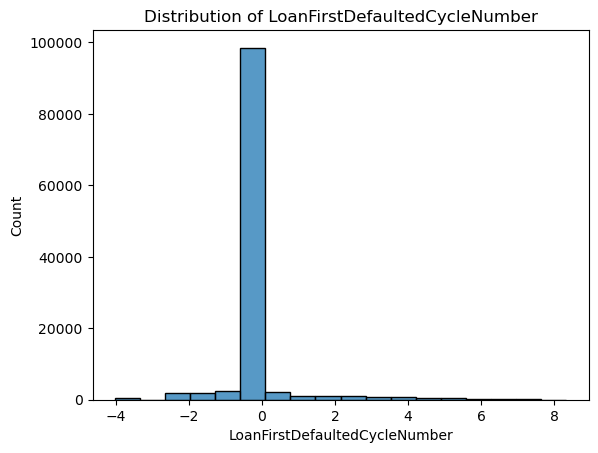

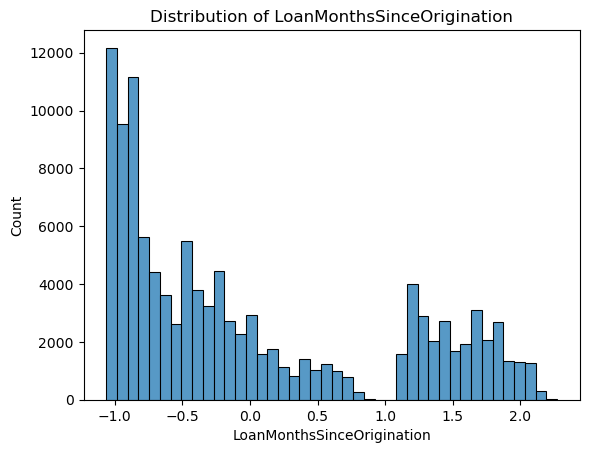

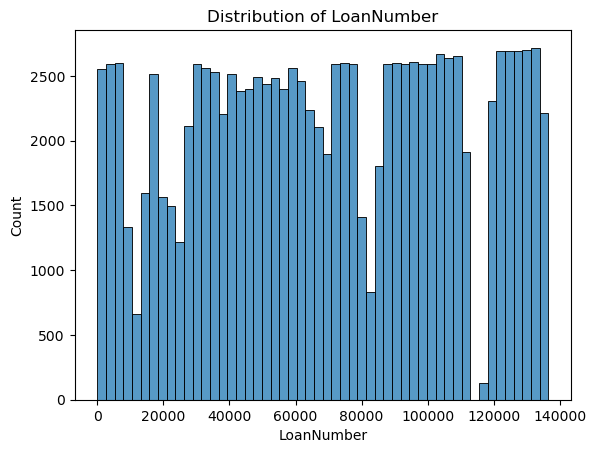

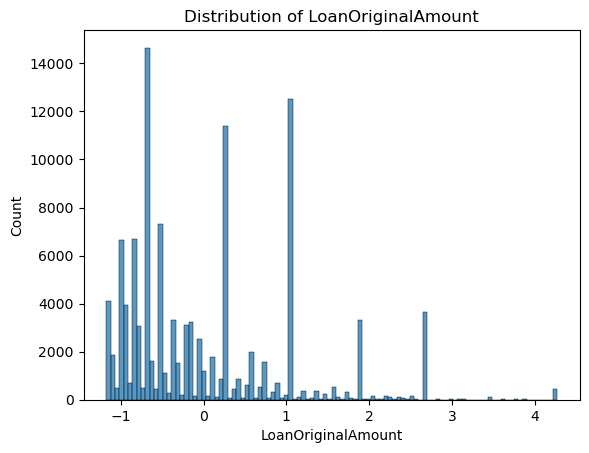

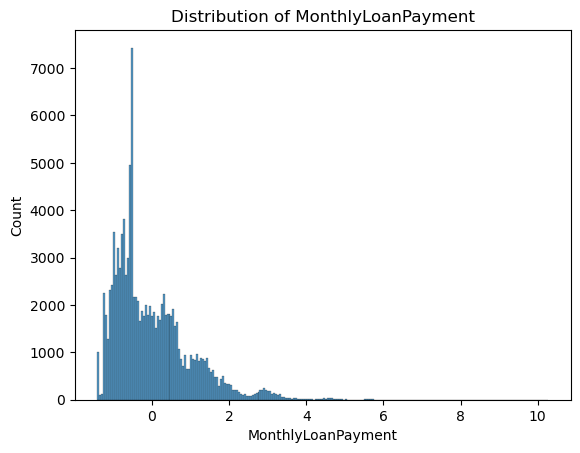

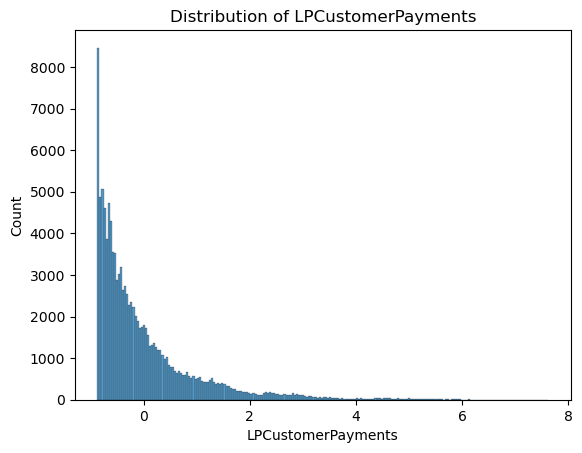

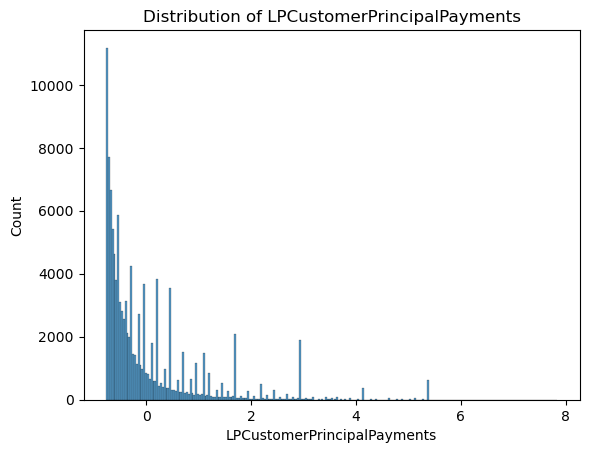

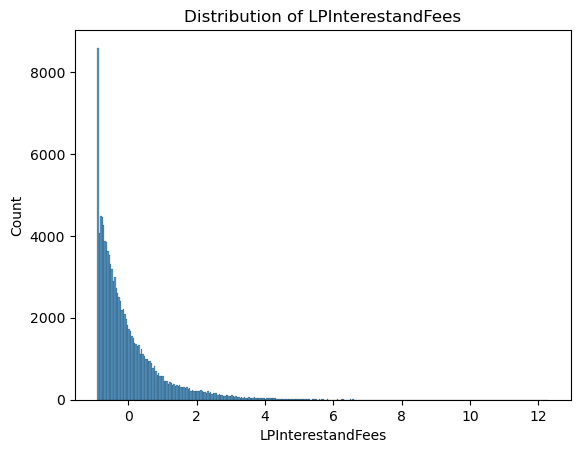

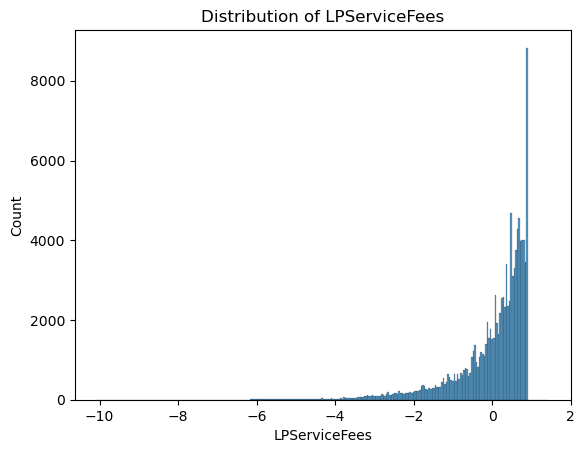

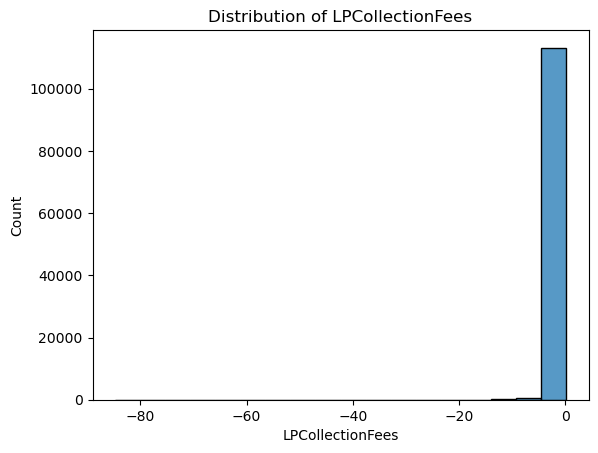

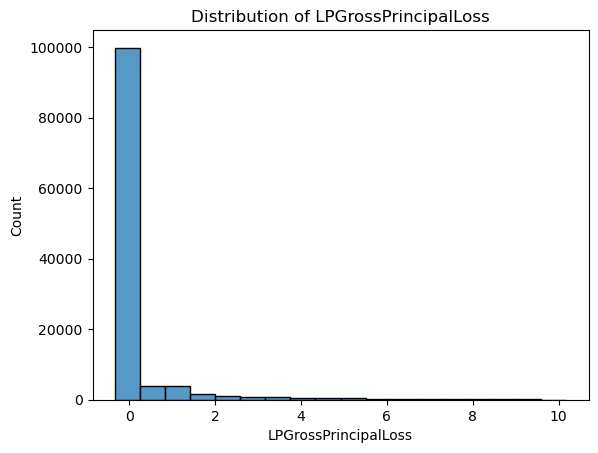

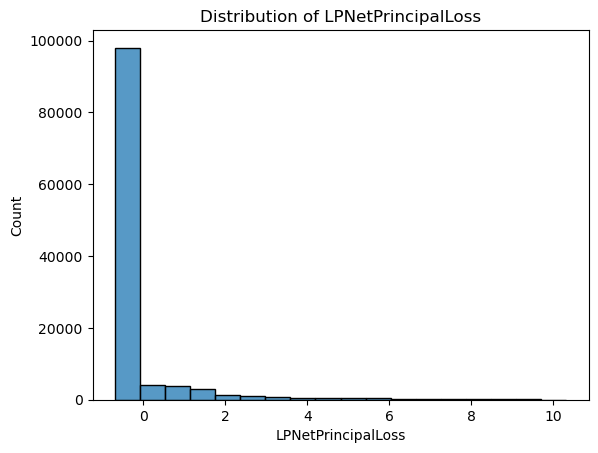

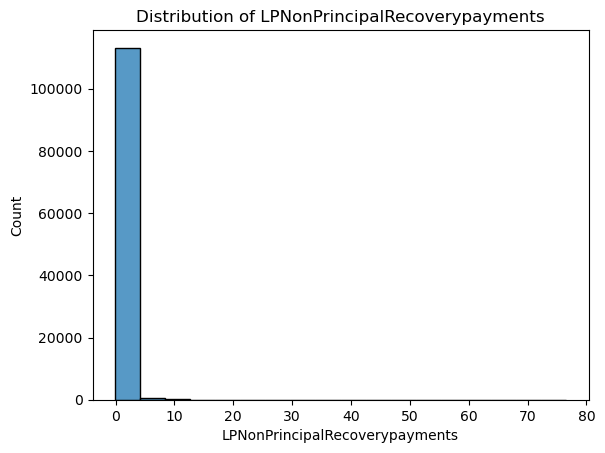

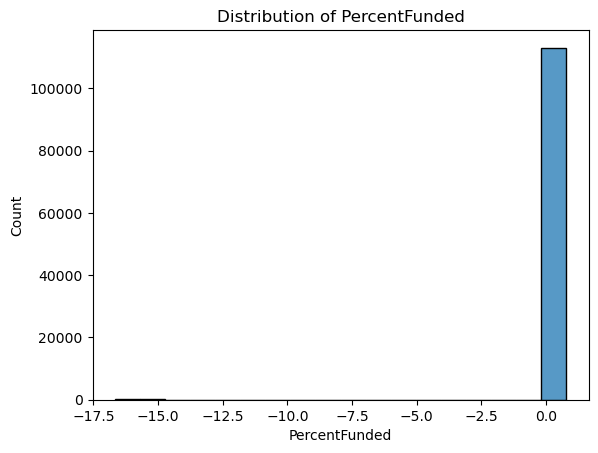

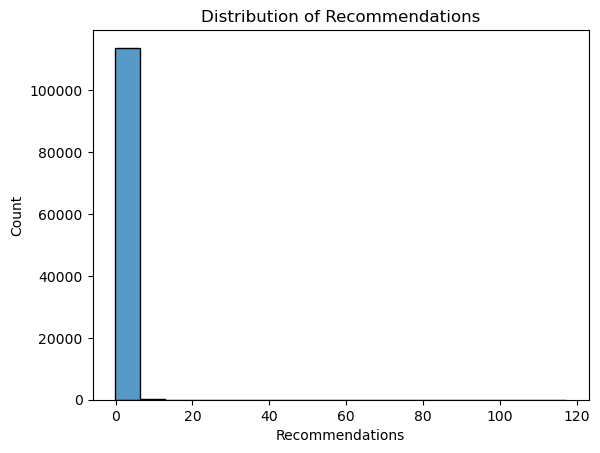

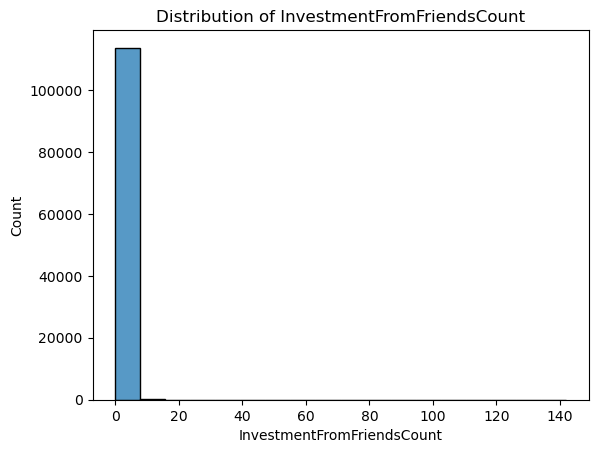

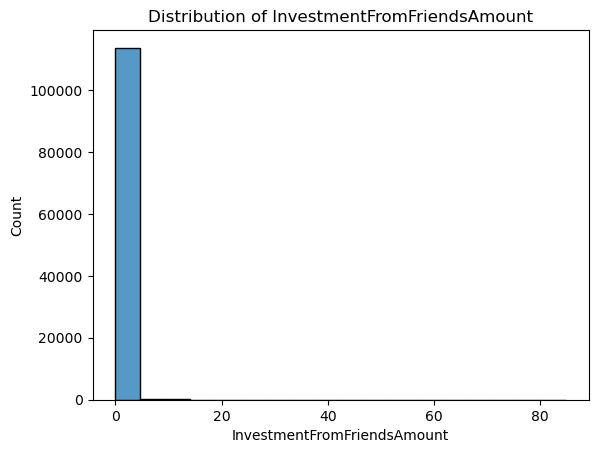

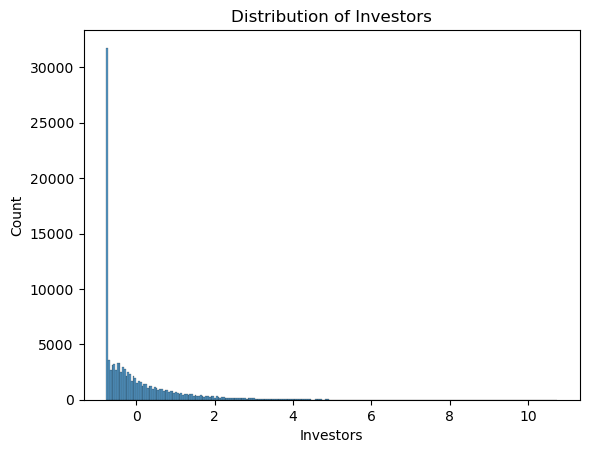

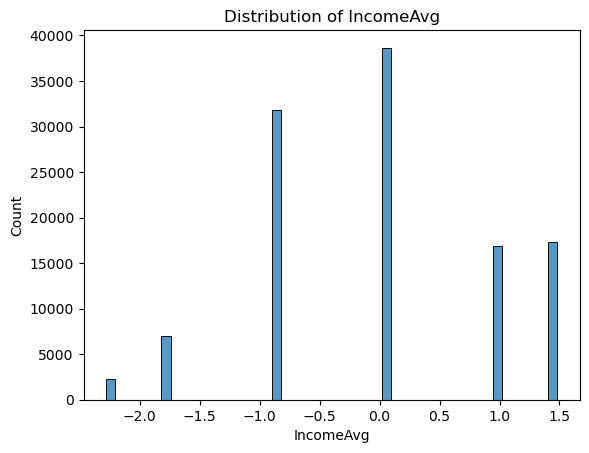

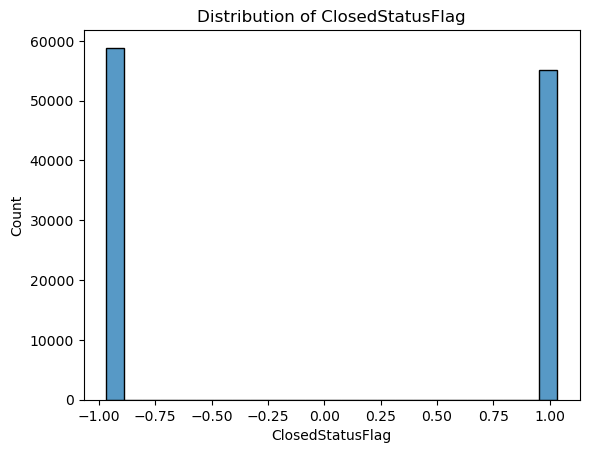

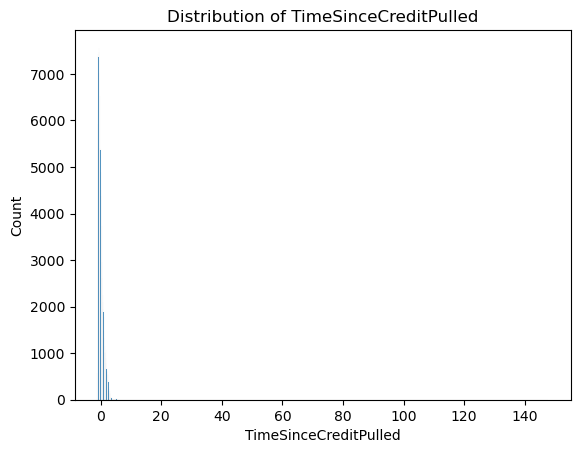

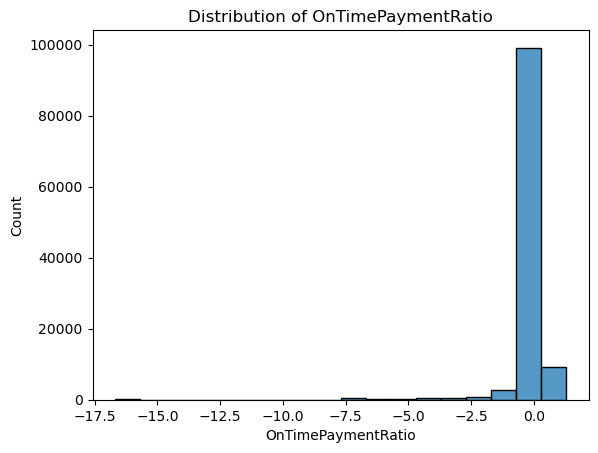

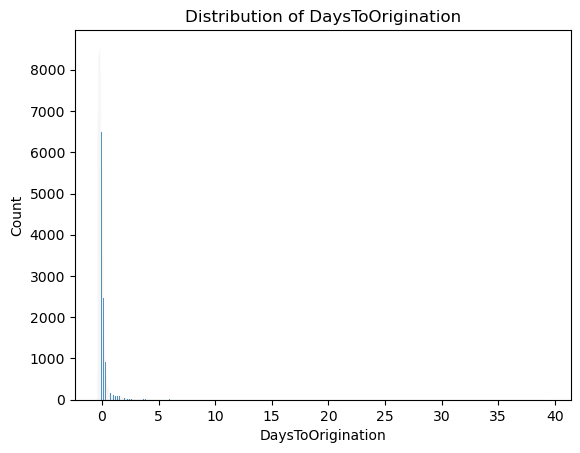

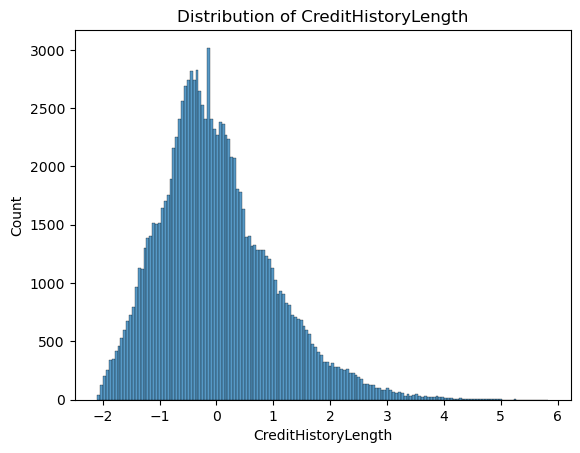

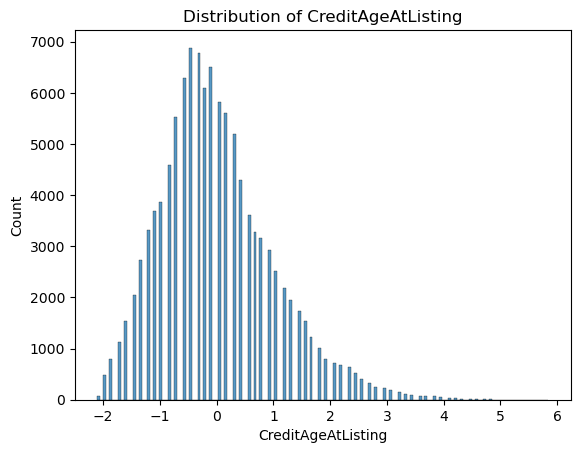

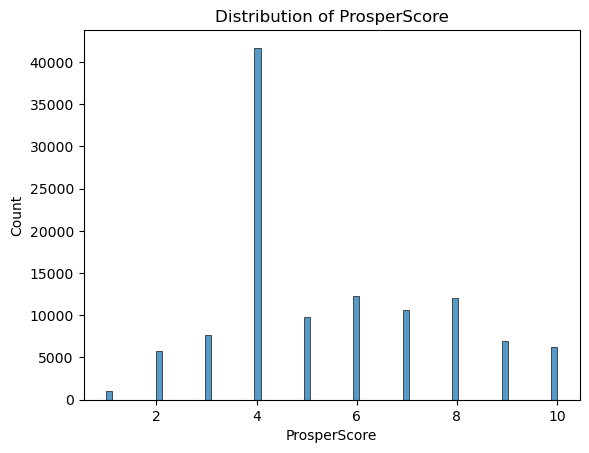

In [166]:
# Visualize Distributions of Numerical Features
for col in Processed_df.select_dtypes(include=['float64', 'int64','int32']):
    sns.histplot(Processed_df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

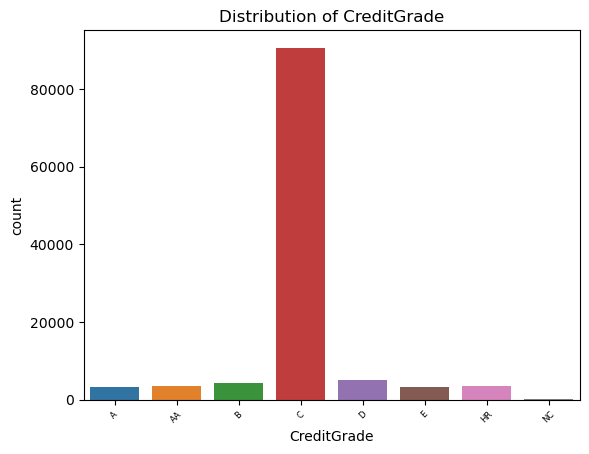

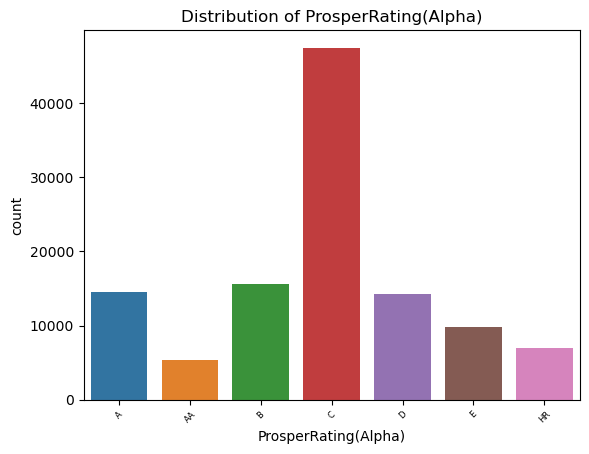

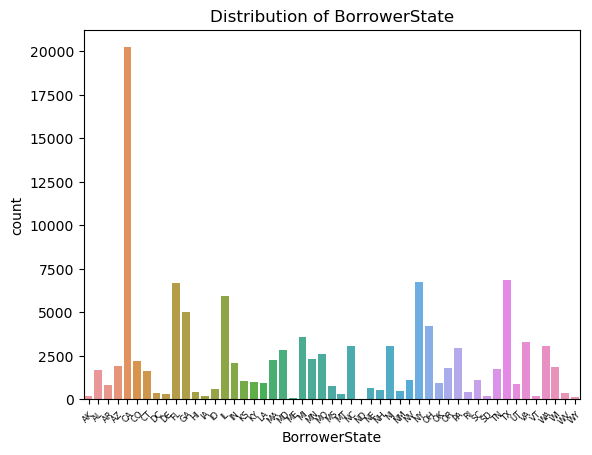

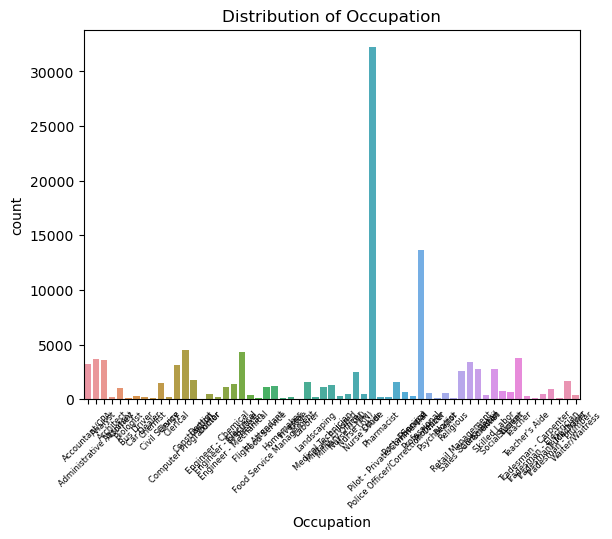

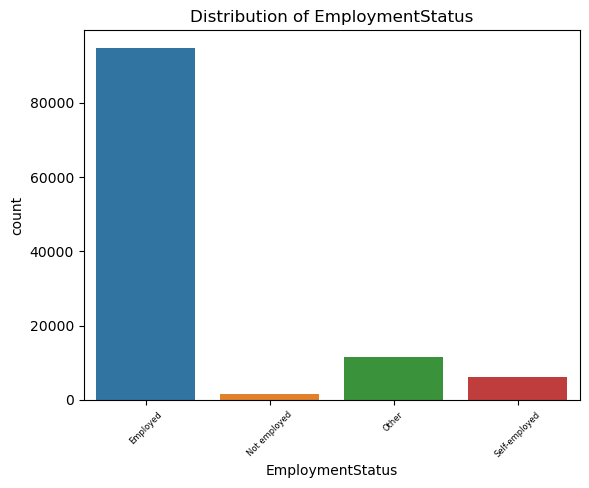

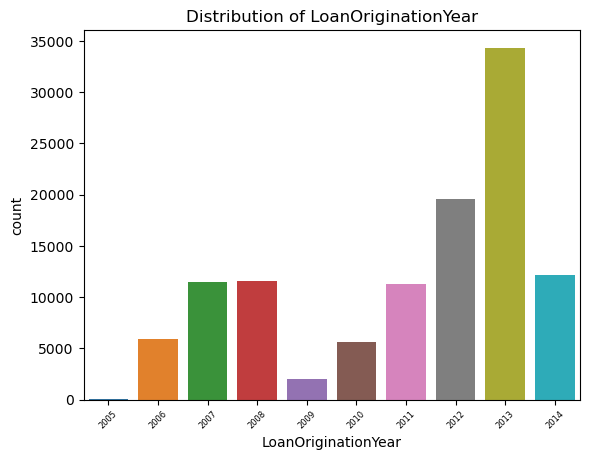

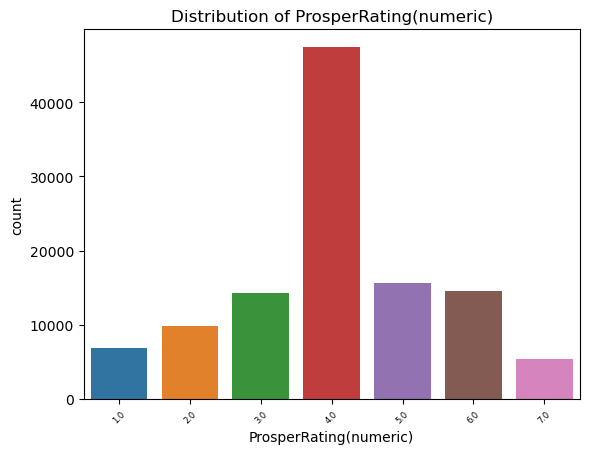

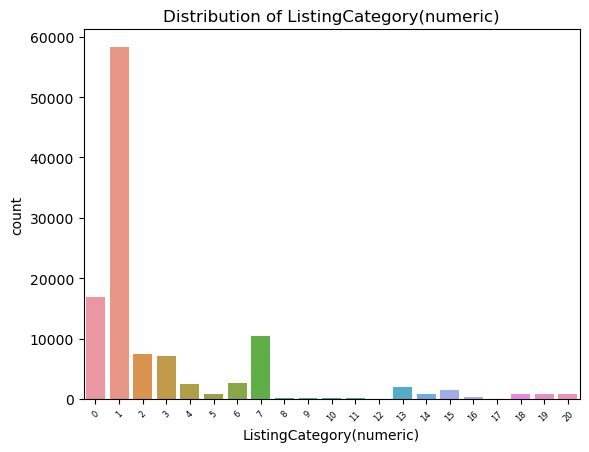

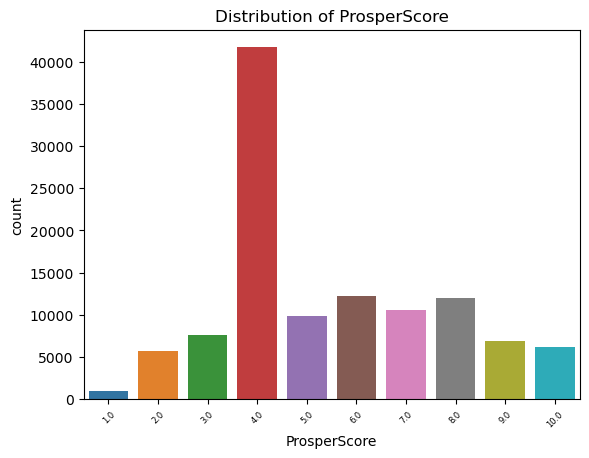

In [167]:
one_hot_columns = [col for col in Processed_df.columns if '_' in col] 

# Group the one-hot encoded columns by their original feature 
grouped_columns = {}
for col in one_hot_columns:
    original_feature = col.split('_')[0] 
    if original_feature not in grouped_columns:
        grouped_columns[original_feature] = [col]
    else:
        grouped_columns[original_feature].append(col)

# Visualize the distribution of each original feature
for original_feature, encoded_columns in grouped_columns.items():
    # Melt the DataFrame to long format for easier plotting
    melted_df = Processed_df.melt(id_vars=None, value_vars=encoded_columns, var_name=original_feature, value_name='Count')
    melted_df = melted_df[melted_df['Count'] > 0]

    # Extract category name after '_'
    melted_df[original_feature] = melted_df[original_feature].str.split('_').str[1] 

    sns.countplot(x=original_feature, data=melted_df)
    plt.title(f'Distribution of {original_feature}')
    plt.xticks(rotation=45,fontsize=6)
    plt.show()

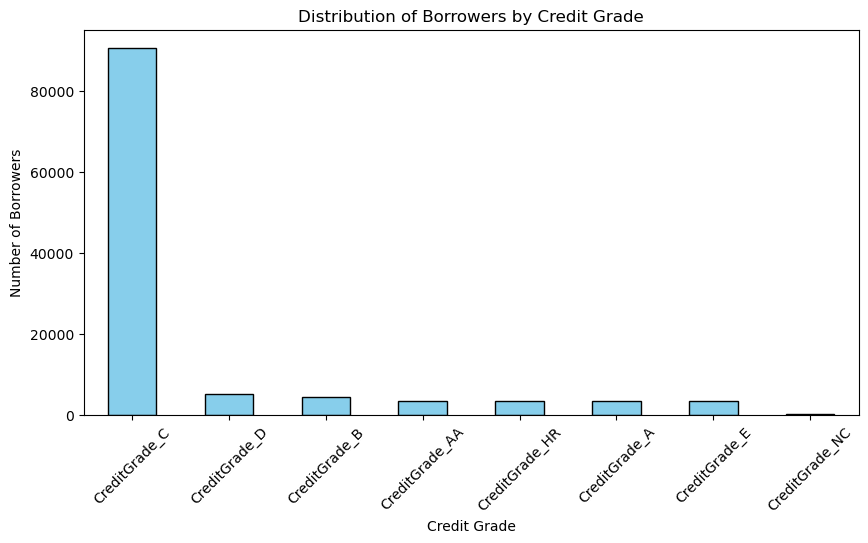

In [168]:
# Extract columns related to CreditGrade 
credit_grade_columns = [col for col in cat_data.columns if col.startswith("CreditGrade")]

# Sum up the values in each one-hot encoded column to get the count of borrowers for each grade
credit_grade_counts = cat_data[credit_grade_columns].sum().sort_values(ascending=False)

# Plot the counts
plt.figure(figsize=(10, 5))
credit_grade_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Credit Grade")
plt.ylabel("Number of Borrowers")
plt.title("Distribution of Borrowers by Credit Grade")
plt.xticks(rotation=45)
plt.show()


In [169]:
# Insights:
# Most borrowers have lower credit grades (C and below).
# This suggests a higher risk profile for the lending institution.

# Recommendations:
# Diversify loan portfolio to reduce reliance on lower credit grade borrowers.
# Review and refine credit scoring models for more accurate risk assessment.

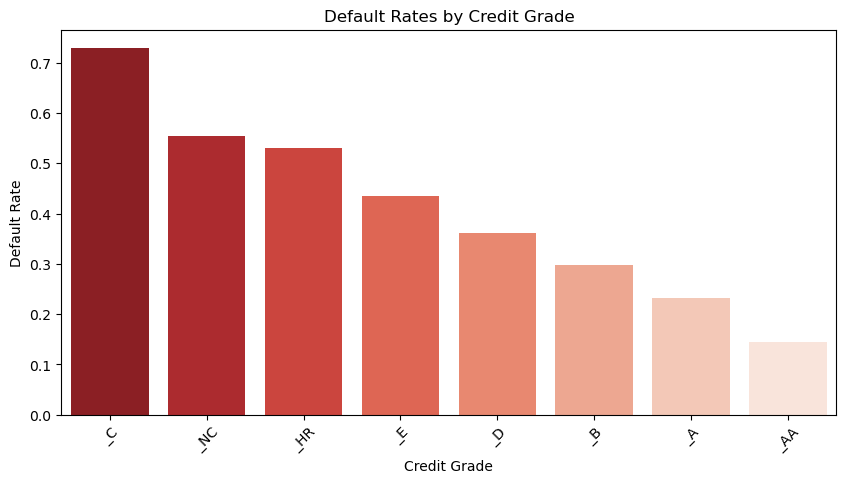

In [170]:
# Identify one-hot encoded columns related to Credit Grade
credit_grade_columns = [col for col in Processed_df.columns if "CreditGrade" in col]

# Compute the default rate for each credit grade
default_rates = {}

for grade_col in credit_grade_columns:
    # Extract the original grade name
    grade_name = grade_col.replace("CreditGrade", "")
    
    # Calculate the mean default rate for that grade
    default_rates[grade_name] = Processed_df.loc[Processed_df[grade_col] == 1, "LoanStatus"].mean()

# Convert to a sorted Series for better visualization
default_rates = pd.Series(default_rates).sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=default_rates.index, y=default_rates, palette="Reds_r")

plt.title("Default Rates by Credit Grade")
plt.xlabel("Credit Grade")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.show()


In [171]:
# Insights:
# Default rates increase significantly as the credit grade decreases.
# Credit grade is a strong predictor of loan performance.

# Recommendations:
# Adjust pricing and underwriting based on credit grade to reflect varying risk levels.
# Implement risk mitigation strategies for borrowers with lower credit grades.

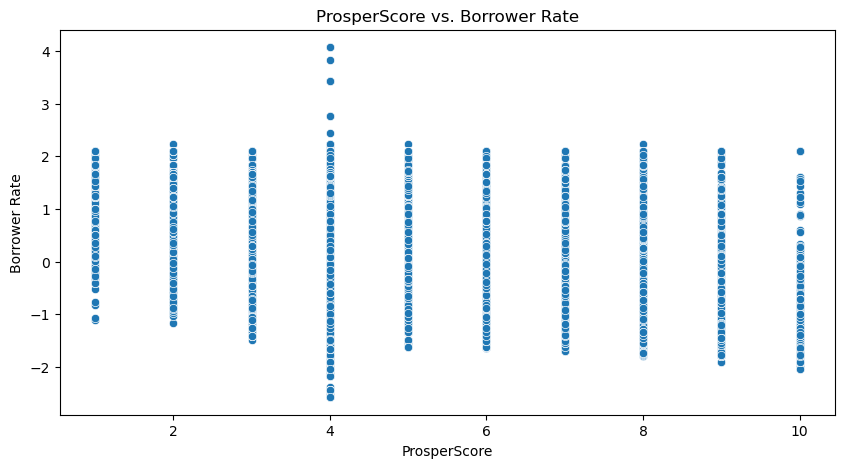

              BorrowerRate  BorrowerAPR
ProsperScore                           
1.0               1.460911     1.515203
2.0               1.048971     1.112664
3.0               0.736378     0.802057
4.0               0.043096    -0.045566
5.0               0.486302     0.547915
6.0               0.179808     0.245945
7.0              -0.102924    -0.039938
8.0              -0.548444    -0.501597
9.0              -0.903718    -0.869259
10.0             -1.281708    -1.300168


In [172]:
# 7. ProsperScore and Borrower Rate/APR
plt.figure(figsize=(10, 5))
sns.scatterplot(x='ProsperScore', y='BorrowerRate', data=Processed_df)
plt.title("ProsperScore vs. Borrower Rate")
plt.xlabel("ProsperScore")
plt.ylabel("Borrower Rate")
plt.show()

# Calculate average BorrowerRate and BorrowerAPR by ProsperScore
avg_rates = Processed_df.groupby('ProsperScore')[['BorrowerRate', 'BorrowerAPR']].mean()
print(avg_rates)

In [173]:
# Insights:
# ProsperScore is a Strong Predictor: ProsperScore is a powerful predictor of both Borrower Rate and BorrowerAPR. As creditworthiness increases (higher ProsperScore), interest rates tend to decrease.

# Recommendations:    
# Risk-Based Pricing: Lenders can utilize ProsperScore to differentiate interest rates, offering better terms to lower-risk borrowers.

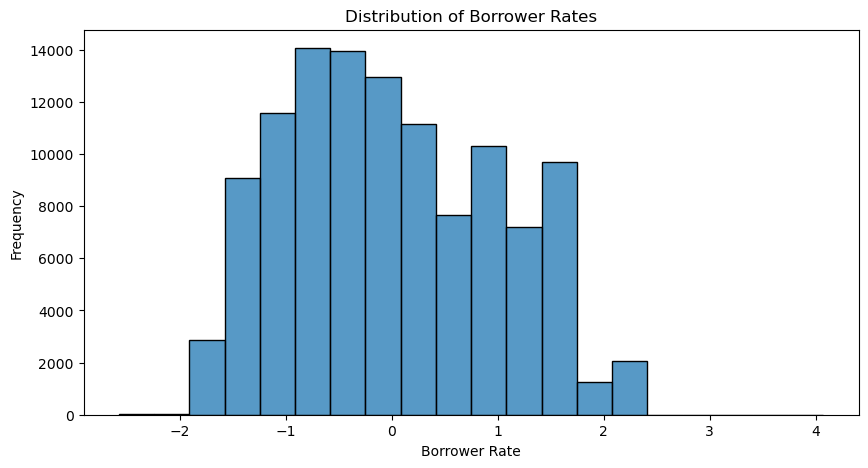

In [174]:
# 4. Highest Number of BorrowerRate
plt.figure(figsize=(10, 5))
sns.histplot(Processed_df['BorrowerRate'], bins=20) 
plt.title("Distribution of Borrower Rates")
plt.xlabel("Borrower Rate")
plt.ylabel("Frequency")
plt.show()

In [175]:
# Insights:
# Right-Skewed Distribution: The majority of borrowers have lower interest rates, while a smaller proportion have significantly higher rates.

# Recommendations:
# Pricing Implications: Lenders can optimize pricing strategies by targeting borrowers with appropriate interest rates based on their risk profiles.
# Data Quality Check: The presence of negative rates warrants further investigation to ensure data accuracy.

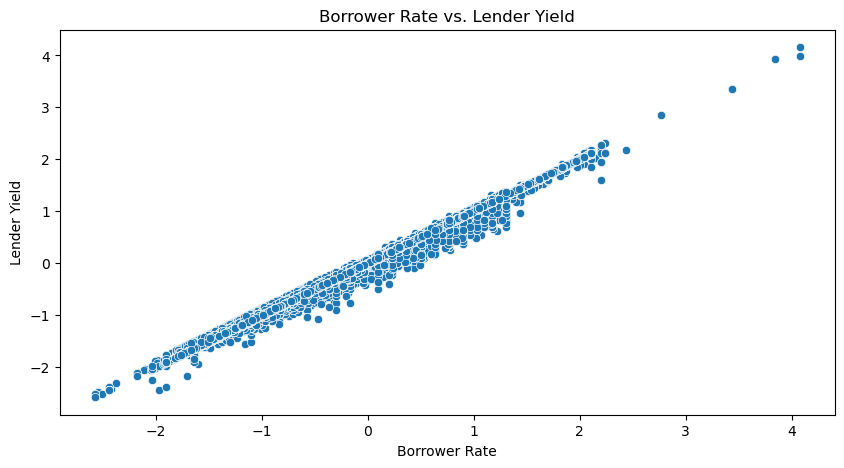

Correlation between BorrowerRate and LenderYield: 0.9992113306509344


In [176]:
# 5. BorrowerRate and LenderYield
plt.figure(figsize=(10, 5))
sns.scatterplot(x='BorrowerRate', y='LenderYield', data=Processed_df)
plt.title("Borrower Rate vs. Lender Yield")
plt.xlabel("Borrower Rate")
plt.ylabel("Lender Yield")
plt.show()

correlation = Processed_df['BorrowerRate'].corr(Processed_df['LenderYield'])
print("Correlation between BorrowerRate and LenderYield:", correlation)

In [177]:
# Insights:
# Strong positive correlation between Borrower Rate and Lender Yield.
# Borrower Rate is a key driver of Lender Yield.

# Recommendations:
# Optimize pricing strategies to maximize Lender Yield while managing risk.
# Develop predictive models to forecast Lender Yield based on Borrower Rate and other factors.

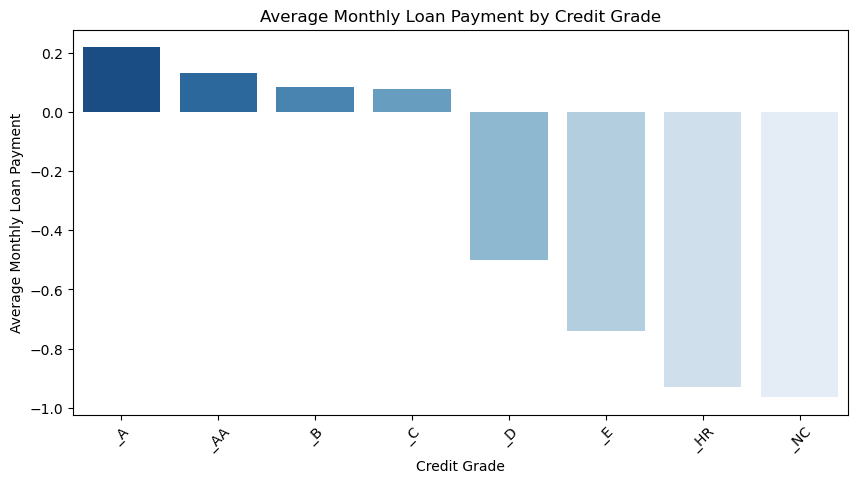

In [178]:
# Identify one-hot encoded columns related to Credit Grade
credit_grade_columns = [col for col in Processed_df.columns if "CreditGrade" in col]

# Compute the average monthly loan payment for each credit grade
avg_monthly_payment = {}

for grade_col in credit_grade_columns:
    # Extract the original grade name
    grade_name = grade_col.replace("CreditGrade", "")
    
    # Filter rows where this credit grade is 1
    subset = Processed_df.loc[Processed_df[grade_col] == 1, "MonthlyLoanPayment"]
    
    # Ensure subset is not empty before calculating mean
    if not subset.empty:
        avg_monthly_payment[grade_name] = subset.mean()
    else:
        avg_monthly_payment[grade_name] = 0  # Assign 0 if no data is available

# Convert to a sorted Series for better visualization
avg_monthly_payment = pd.Series(avg_monthly_payment).sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_monthly_payment.index, y=avg_monthly_payment, palette="Blues_r")

plt.title("Average Monthly Loan Payment by Credit Grade")
plt.xlabel("Credit Grade")
plt.ylabel("Average Monthly Loan Payment")
plt.xticks(rotation=45)
plt.show()

In [179]:
# Insights:
# Average monthly loan payments decrease as the credit grade decreases.
# Borrowers with higher credit grades tend to qualify for larger loans.

# Recommendations:
# Adjust loan terms and pricing based on credit grade and loan amount.
# Analyze the relationship between loan amount, credit grade, and loan performance.

In [180]:
# Define the target column
target_column = 'LoanStatus' 

# Separate target column before correlation analysis
target = Processed_df[target_column]  # Store the target column
df_features = Processed_df.drop(columns=[target_column])  # Exclude target

# Compute correlation matrix (absolute values)
corr_matrix = df_features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9 and show their pairs
high_correlation_pairs = []
for column in upper.columns:
    correlated_with = upper.index[upper[column] > 0.9].tolist()
    if correlated_with:  # If there are correlations above 0.9
        for correlated_col in correlated_with:
            high_correlation_pairs.append((column, correlated_col))

# Print highly correlated feature pairs
print("Highly correlated feature pairs (> 0.9 correlation):")
for col1, col2 in high_correlation_pairs:
    print(f" {col1} ↔ {col2} (Correlation: {corr_matrix.loc[col1, col2]:.2f})")

# Find the unique columns involved
high_correlation_columns = set([col for pair in high_correlation_pairs for col in pair])

print("\n Features involved in high correlation:")
print(list(high_correlation_columns))


C:\Users\Sc\AppData\Local\Temp\ipykernel_34104\1136675028.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_features.corr().abs()


Highly correlated feature pairs (> 0.9 correlation):
 BorrowerRate ↔ BorrowerAPR (Correlation: 0.99)
 LenderYield ↔ BorrowerAPR (Correlation: 0.99)
 LenderYield ↔ BorrowerRate (Correlation: 1.00)
 CreditScoreRangeUpper ↔ CreditScoreRangeLower (Correlation: 1.00)
 OpenCreditLines ↔ CurrentCreditLines (Correlation: 0.96)
 TotalTrades ↔ TotalCreditLinespast7years (Correlation: 0.91)
 OnTimeProsperPayments ↔ TotalProsperPaymentsBilled (Correlation: 0.99)
 LoanMonthsSinceOrigination ↔ ListingNumber (Correlation: 0.94)
 LoanNumber ↔ ListingNumber (Correlation: 1.00)
 LoanNumber ↔ LoanMonthsSinceOrigination (Correlation: 0.94)
 MonthlyLoanPayment ↔ LoanOriginalAmount (Correlation: 0.93)
 LPCustomerPrincipalPayments ↔ LPCustomerPayments (Correlation: 0.98)
 LPNetPrincipalLoss ↔ LPGrossPrincipalLoss (Correlation: 0.99)
 CreditAgeAtListing ↔ CreditHistoryLength (Correlation: 1.00)
 ProsperRating(numeric)_1.0 ↔ ProsperRating(Alpha)_HR (Correlation: 1.00)
 ProsperRating(numeric)_2.0 ↔ ProsperRatin

In [181]:
# List of highly correlated columns
high_corr_cols = highly_correlated_features = [
    "BorrowerRate", "BorrowerAPR",
    "LenderYield",
    "CreditScoreRangeUpper", "CreditScoreRangeLower",
    "OpenCreditLines", "CurrentCreditLines",
    "TotalTrades", "TotalCreditLinespast7years",
    "OnTimeProsperPayments", "TotalProsperPaymentsBilled",
    "LoanMonthsSinceOrigination", "ListingNumber",
    "LoanNumber",
    "MonthlyLoanPayment", "LoanOriginalAmount",
    "LPCustomerPrincipalPayments", "LPCustomerPayments",
    "LPNetPrincipalLoss",
    "CreditAgeAtListing", "CreditHistoryLength",
]


# Define target variable
target_column = "LoanStatus"  

# Select only the relevant features
X = Processed_df[high_corr_cols]
y = Processed_df[target_column]

# Split data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.DataFrame({
    "Feature": high_corr_cols,
    "Importance": rf.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Print results
print(feature_importances)


                        Feature  Importance
16  LPCustomerPrincipalPayments    0.264315
18           LPNetPrincipalLoss    0.138877
12                ListingNumber    0.111473
17           LPCustomerPayments    0.106141
13                   LoanNumber    0.103939
15           LoanOriginalAmount    0.070824
11   LoanMonthsSinceOrigination    0.069685
14           MonthlyLoanPayment    0.052268
1                   BorrowerAPR    0.011570
0                  BorrowerRate    0.011376
2                   LenderYield    0.009711
20          CreditHistoryLength    0.008626
19           CreditAgeAtListing    0.006285
8    TotalCreditLinespast7years    0.005858
4         CreditScoreRangeLower    0.005463
7                   TotalTrades    0.004980
3         CreditScoreRangeUpper    0.004864
5               OpenCreditLines    0.004246
6            CurrentCreditLines    0.004120
10   TotalProsperPaymentsBilled    0.002719
9         OnTimeProsperPayments    0.002658


In [182]:
Processed_df = Processed_df.drop(['LPGrossPrincipalLoss','LPCustomerPayments','MonthlyLoanPayment','OnTimeProsperPayments','TotalTrades','OpenCreditLines','BorrowerRate','ListingKey','ListingNumber','MemberKey','LoanKey','GroupKey','DateCreditPulled','CreditAgeAtListing','ClosedDate','CreditScoreRangeLower','CreditScoreRangeUpper','LoanOriginationDate','ListingCreationDate','FirstRecordedCreditLine','LoanNumber'
], axis=1)  

In [183]:
# Drop all columns that start with 'ProsperRating(Alpha)'
Processed_df = Processed_df.loc[:, ~Processed_df.columns.str.startswith("ProsperRating(Alpha)")]

# Display remaining columns
print(Processed_df.columns)

Index(['IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeVerifiable', 'Q1',
       'Q2', 'Q3', 'Q4', 'CreditGrade_A', 'CreditGrade_AA', 'CreditGrade_B',
       ...
       'ProsperScore_2.0', 'ProsperScore_3.0', 'ProsperScore_4.0',
       'ProsperScore_5.0', 'ProsperScore_6.0', 'ProsperScore_7.0',
       'ProsperScore_8.0', 'ProsperScore_9.0', 'ProsperScore_10.0',
       'ProsperScore'],
      dtype='object', length=234)


In [184]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(Processed_df.drop(columns=['LoanStatus']), Processed_df['LoanStatus'])  # Drop the target column from features

# Get feature importances
feature_importances = pd.DataFrame({'Feature': Processed_df.drop(columns=['LoanStatus']).columns,
                                    'Importance': rf.feature_importances_})

print(feature_importances.sort_values(by='Importance', ascending=False))

                         Feature    Importance
179             ClosedStatusFlag  2.422529e-01
167  LPCustomerPrincipalPayments  1.327683e-01
163    LoanCurrentDaysDelinquent  1.120785e-01
165   LoanMonthsSinceOrigination  8.747874e-02
171           LPNetPrincipalLoss  6.007931e-02
..                           ...           ...
80            Occupation_Dentist  7.381908e-06
218  ListingCategory(numeric)_17  5.584055e-06
43              BorrowerState_ND  2.462110e-06
92              Occupation_Judge  1.901900e-06
184     LoanOriginationYear_2005  4.243262e-08

[233 rows x 2 columns]
